# Import Packages and Read In Data

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#Kaggle: import os
#Kaggle: print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import norm
from scipy import stats
import math
from sklearn import preprocessing 

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, r2_score

import statsmodels.api as sm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allows me to return multiple outputs from one cell i.e. print n things at once

#Kaggle: from subprocess import check_output
#Kaggle: print(check_output(["ls", "../input"]).decode("utf8"))

Now, I want to pip install pygam (GAMs will be used in modelling later). Internet has to be turned on everytime as I have to pip install each time (turn on Internet in right hand banner)

In [6]:
# Kaggle: !pip install pygam
import pygam
from pygam import GAM, LinearGAM, s, f

Reading in train and test datasets

In [7]:
df_train = pd.read_csv("C:/Users/kilia/OneDrive/Documents/ML_DS/Kaggle/Ames/train.csv") 
df_test = pd.read_csv("C:/Users/kilia/OneDrive/Documents/ML_DS/Kaggle/Ames/test.csv")
print("train shape: " + str(df_train.shape))
print("test shape: " + str(df_test.shape))

train shape: (1460, 81)
test shape: (1459, 80)


# Investigation: Basics
Quick investigation into df_train
> * Get basic descriptions of the data by column
*   Plot no. of missing values per column (good plotting link: https://realpython.com/python-matplotlib-guide/)

In [8]:
df_train.describe(include = 'all') # getting a feel for the data from a height
# df_train.info() # useful to check how many non-nulls are in each row

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


<BarContainer object of 19 artists>

Text(0.5, 1.0, 'Missing Values')

Text(0, 0.5, 'No. of Missing Values')

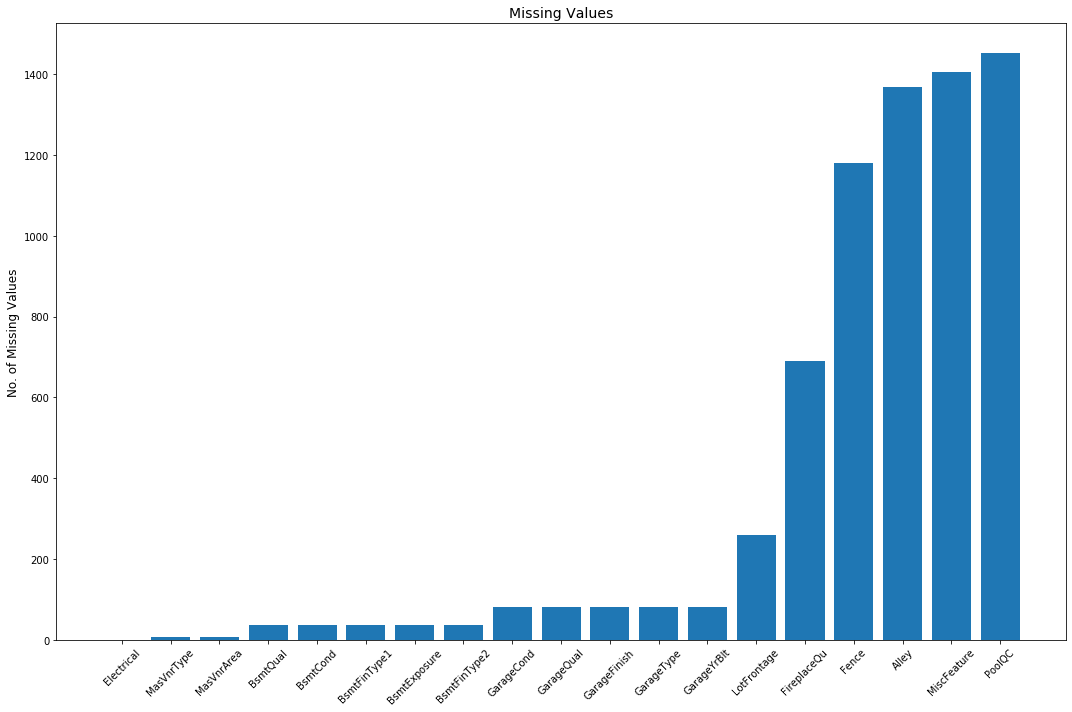

In [9]:
missing = df_train.isnull().sum()
missing = missing[missing > 0] # restrict to only look at columns that have missing values
missing.sort_values(inplace = True)
missing = missing.to_frame().reset_index() # change missing into a dataframe to allow me to use normal fig,ax logic in plotting below. Series does not allow me to call arguments as normal when plotting. reset_index() required so that I can rename the columns
missing.columns = ['Names', 'Numbers']

fig, ax = plt.subplots(figsize=(15,10))   #  figure size
ax.bar(x='Names', height='Numbers', data=missing)
ax.set_title('Missing Values', fontsize=14)
ax.set_ylabel("No. of Missing Values", fontsize=12)
ax.tick_params(axis='x', rotation=45)
fig.tight_layout() # cleans the plot format

We will deal with missing values in the next few sections.

Here, I will create a dataset (df_train_keep) which is an exact **copy of df_train** from which we will drop columns. We will ultimately pass df_train_keep (with some changes) through to our models instead of messing with our original df_train.


In [10]:
df_train_keep = df_train.copy()

Now, I want to **check for dupes** in 'Id' to ensure that our models aren't going to learn based on the same house multiple times.

In [11]:
ids_unique = len(set(df_train_keep.Id))
ids_total = df_train_keep.shape[0]
ids_dupe = ids_total - ids_unique
print("There is/are " + str(ids_dupe) + " duplicate(s) IDs for " + str(ids_total) + " total entries")
if(ids_dupe == 0):
    df_train_keep.drop(['Id'], axis=1, inplace=True)
else:
    print("Potential issue: %s Id's are duped. Please investigate further." % (ids_dupe))

There is/are 0 duplicate(s) IDs for 1460 total entries


Before moving on to imputing nans by looking at each column, I want to do a little bit of **ad-hoc analysis**. 

My logic here is that I want to check for outliers and check distributions of certain features before imputing, because, "technically", imputation is contaminating the real data that was supplied. 


# Investigation: SalePrice
Firstly, I will investigate SalePrice (our target variable). I had previously looked at the logged distn of SalePrice but then I thought, does that really matter? From looking on Stack Exchange and at various blogs, I reckon that I should not transform the distribution of the dependent variable (DV) unless necessary. 

Why not transform my DV just to make it more normal anyway? 
1. Because transforming your DV affects how you interpret the model.
2. Because you want to trust that your model works correctly on the actual distribution of your DV, not the transformed distribution. (? I have seen this argument mentioned on multiple occasions but I am not convinced. I need to confirm.)


When might transforming your DV be a good idea? 
1. Take linear regression for example, where you want a linear relationship between each of the IV's and the DV. Then transforming the DV by itself may lead to a linear relationship with most of the IV's. Alternatively, as would be the usual procedure, you could transform each IV that does not naturally exhibit a linear relationship with the DV.

Undoubtedly, there are other points to be made here, but this will suffice for now.

In my investigation of SalePrice, I will:
* Look at the distribution of SalePrice
* Look at the boxplot to eyeball outliers

[[]]

Text(0.5, 0, '')

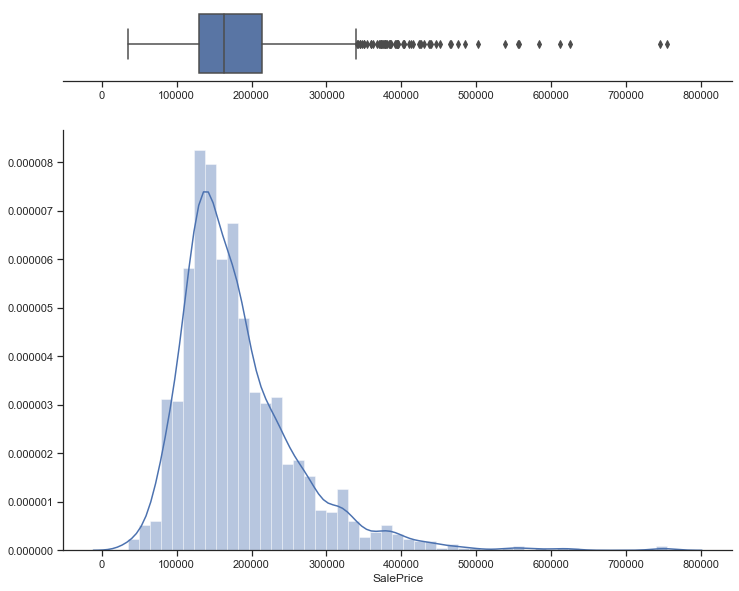

In [46]:
# sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12,10))

sns.boxplot(df_train_keep['SalePrice'], ax=ax_box)
sns.distplot(df_train_keep['SalePrice'], ax=ax_hist)

ax_box.set(yticks=[])
ax_box.tick_params(axis='x', labelbottom='on') #calling labelbottom turns ticks on regardless
ax_box.set_xlabel("")
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

# quantiles for outlier check: upper_quartile = np.percentile(df_train_keep['SalePrice'], 75); lower_quartile = np.percentile(df_train_keep['SalePrice'], 25); iqr = upper_quartile - lower_quartile

Obviously right-skewed. Resembles a log-normal distribution. As mentioned, this plot is just to get an idea of how SalePrice is distributed. I am not making any decisions right now based on the distribution.

It is worth noting that there are clearly outliers (easily seen on the boxplot). Again, keep this in mind as we may come back and remove outliers at a later stage.

# Creating Dataframes

Creating a numerical and categorical dataframe before creating a heatmap.

The columns *MSSubClass*, *OverallQual*, *OverallCond* and *MoSold* are of type *int64* but are actually categorical (note: *MoSold* is less straightforward but I see it as nominal categorical), so I have to write ad-hoc code for those cols in my conditions below.

Then I simply make lists of the column names in the numerical and categorical dataframes so that I can call them later if I need to.

In [47]:
df_train_keep_num = df_train_keep.loc[:, (df_train_keep.dtypes == 'float64') | (df_train_keep.dtypes == 'int64')] # equivalent to df_train_keep_num = df_train_keep.select_dtypes(include = ['float64', 'int64'])
df_train_keep_num = df_train_keep_num.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold'], axis = 1) # inplace = True throws warnings here so I'm simply avoiding it for now

df_train_keep_cat = df_train_keep.loc[:, df_train_keep.dtypes == object]
df_train_keep_cat = pd.concat([df_train_keep_cat, df_train_keep.loc[:, ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']]], axis = 1)

# The below 33 cols are what make up df_train_keep_num.
discrete = ["YearBuilt", "YearRemodAdd", "BsmtFullBath", "BsmtHalfBath", 
            "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr",
            "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "YrSold"] # 13 discrete num vars
continuous = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", 
              "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
              "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", 
              "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
              "ScreenPorch", "PoolArea", "MiscVal", "SalePrice"] # 20 continuous numerical vars
 
# The below cols make up df_train_keep_cat
nominal_categorical = ["MSZoning", "Street", "Alley", "LotShape", "LandContour", 
               "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
               "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",
               "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond",
               "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
               "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",
               "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish",
               "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature",
               "SaleType", "SaleCondition", "MoSold"] # again, MoSold could be argued to be ordinal or nominal
ordinal_categorical = ["MSSubClass", "OverallQual", "OverallCond"] 

At this point, the main thing to note is that we have two dataframes (*df_train_keep_num* & *df_train_keep_cat*) that we will be working with going forward. 

Excuse some of the long variable names that I use. I do not want to overwrite previous dataframes for ease of looking back in the middle of a kernel, but once I finish everything, I **might** go back and overwrite so that I don't have so many variable names moving about.

# Investigation: Correlations (Issues with corrmap-cutoff edges)

Remember, we are still in the investigation phase, so I want to check for correlations **within** our features (IV's) and **between** our features and predictor (DV a.k.a target) variable, to see if there are any intereting relationships showing up straight away.

We deal only with the **numerical features** i.e. df_train_keep_num in the window below
>* Firstly, we will create heatmaps for the numerical features 
>* Then we create another heatmap, keeping only those correlations that we deem strong enough to care about
>* We then return a list of the features that are most strongly correlated w/ SalePrice

I intend to run the below code on the dataset after imputations to see if there is any difference - I assume there shouldn't be, if imputation is done correctly.

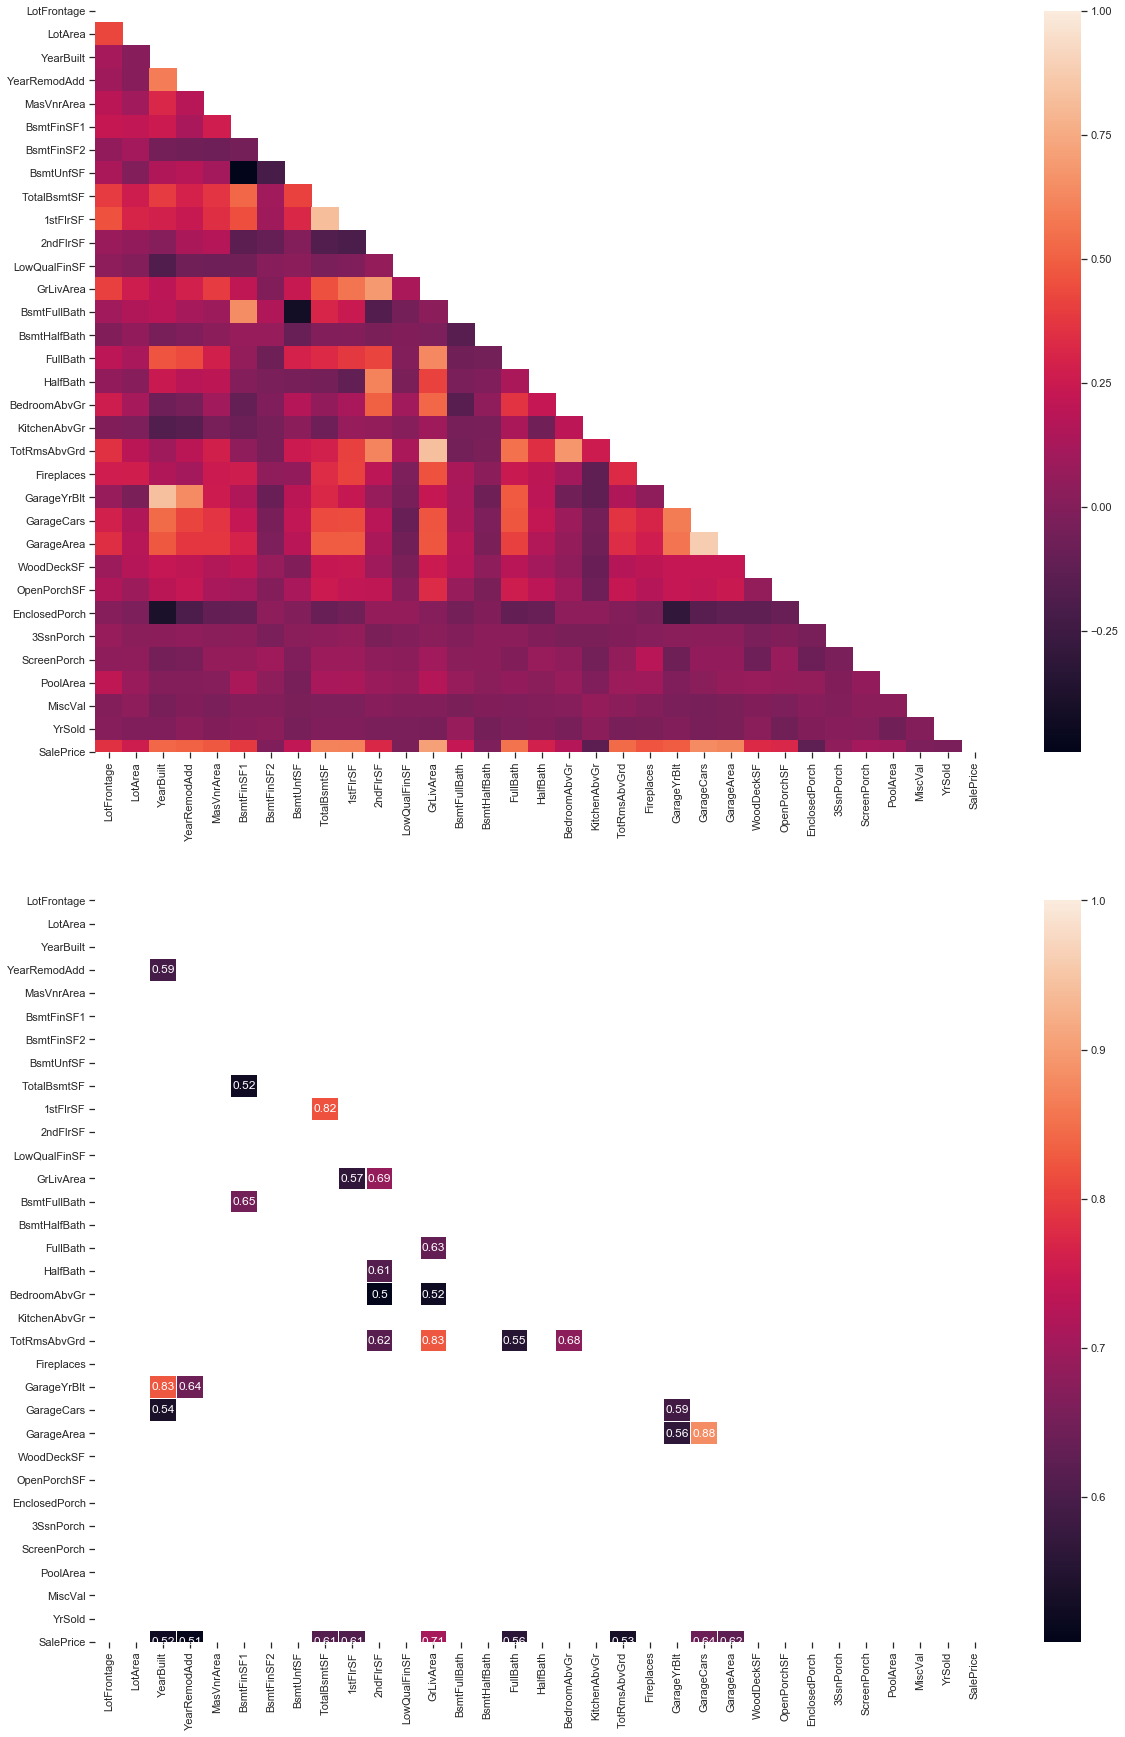

In [54]:
# Here we create a figure instance, and two subplots as I know I will want two subplots below
fig = plt.figure(figsize=(20, 30))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Get correlations between all features in the numerical dataset
df_train_keep_num_corr = df_train_keep_num.corr()

mask = np.zeros_like(df_train_keep_num_corr) # mask any correlations that are almost 0
mask[np.triu_indices_from(mask)] = True # mask the upper triangle, i.e. just keep lower triangle
sns.heatmap(df_train_keep_num_corr, annot=False, mask=mask, ax=ax1) # we use ax parameter to tell seaborn which subplot to use for this plot
# ax1.set_ylim(ymin=-0.5, ymax=len(df_train_keep_num_corr)+0.5) # trying to deal with cutoff

# To get a less cluttered heatmap, let's be more specific about what we want
sns.heatmap(df_train_keep_num_corr[(df_train_keep_num_corr > 0.5) | (df_train_keep_num_corr <= -0.5)], linewidths=.4, annot=True, ax=ax2, mask=mask) # cmap='viridis'
# fig.tight_layout() # this messes up the set figsize above so I'm commenting it out for now

# To avoid affecting the figsize, I am moving the list of correlations to another window below...

Comments on correlations amongst features:
* $\rho(YearBuilt, GarageYrBlt) = 0.83$
* $\rho(GarageArea, GarageCars) = 0.88$

I could surely get a list of everything that is output above, then maybe take a somewhat conservative approach by trying to remove/feature engineer those features that exhibit correlations of larger than, say 0.7. Fow now, I will instead check for multicollinearity later when running regression models.

In [11]:
SalePrice_num_corr = df_train_keep_num.corr()['SalePrice'][:-1] # List of correlations w/ SalePrice only (w/ numerical features)
high_num_corr_features = SalePrice_num_corr[abs(SalePrice_num_corr) > 0.5].sort_values(ascending=False)
print("There is/are {} strongly correlated features with SalePrice:\n{}".format(len(high_num_corr_features), high_num_corr_features))

There is/are 9 strongly correlated features with SalePrice:
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


I repeat the same with ordinal categorical features as they are numerically represented in the dataset. There is no need for a less cluttered heatmap step here as there are less features. 
* By default, ```.corr()``` ignores non numerical categorical features so no issues arise here i.e. it does not try to calculate Pearson correlation where nominal categorical variables are involved, as Pearson correlation does not exist for non-numerical values 
* Pearson correlation calculates how two variables move together, while dividing by their standard deviations (multiplied together) to return a value between 0 and 1: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient



There is/are 1 strongly correlated features with SalePrice:
OverallQual    0.790982
Name: SalePrice, dtype: float64


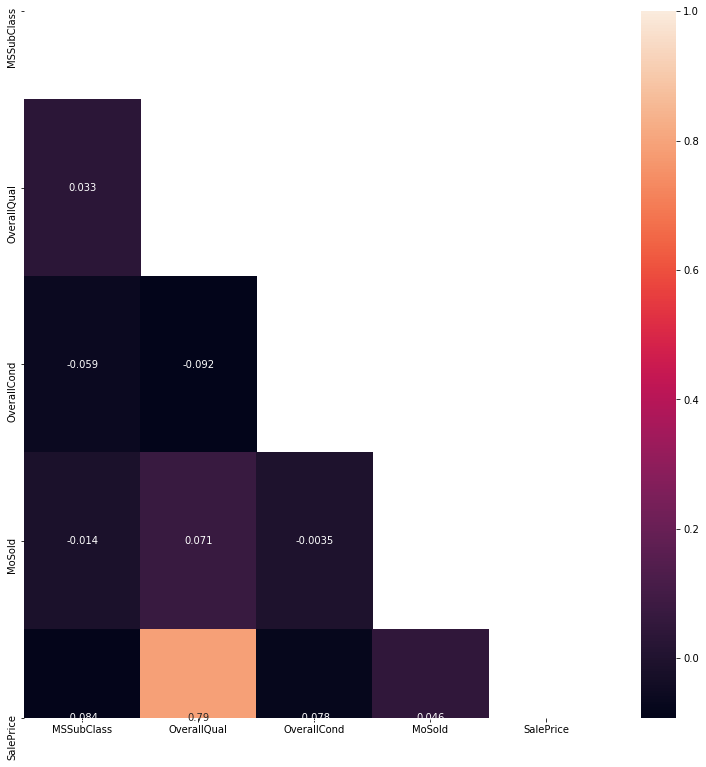

In [12]:
df_train_keep_cat_SalePrice = pd.concat([df_train_keep_cat, df_train_keep['SalePrice']], axis=1) # new categorical df with SalePrice just for the corr heatmap and list of highly correlated features
df_train_keep_cat_SalePrice_corr = df_train_keep_cat_SalePrice.corr()

mask = np.zeros_like(df_train_keep_cat_SalePrice_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (13,13))
sns.heatmap(df_train_keep_cat_SalePrice_corr, annot = True, mask = mask)

# To get correlation for SalePrice only (w/ ordinal categorical features)
SalePrice_ord_cat_corr = df_train_keep_cat_SalePrice.corr()['SalePrice'][:-1]
high_ord_cat_corr_features = SalePrice_ord_cat_corr[abs(SalePrice_ord_cat_corr) > 0.5].sort_values(ascending=False)
print("\nThere is/are {} strongly correlated features with SalePrice:\n{}".format(len(high_ord_cat_corr_features), high_ord_cat_corr_features))

Comments on the ordinal categorical heatmap above:
> All the correlations between the IV's and with the DV are weak, with the exception of **OverallQual** being highly correlated with SalePrice (0.79)

# Investigation: Numerical Features
Continuing on with the initial investigation stage, I will look at certain numerical features that **intuitively** should affect SalePrice (i.e. GrLivArea, YearBuilt & YrSold {due to the global crash in 2008})
* Useful link for multiple plots: https://realpython.com/python-matplotlib-guide/

Text(0.5, 1.0, 'GrLivArea vs SalePrice')

Text(0, 0.5, 'SalePrice')

Text(0.5, 0, 'GrLivArea')

Text(0.5, 1, 'YearBuilt vs SalePrice')

Text(106.0, 0.5, 'SalePrice')

Text(0.5, 540.2176470588236, 'YearBuilt')

C:\Program Files\Python37\Lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


Text(0.5, 1, 'YrSold vs SalePrice')

Text(44.334999999999994, 0.5, 'SalePrice')

Text(0.5, 8.959999999999866, 'YrSold')

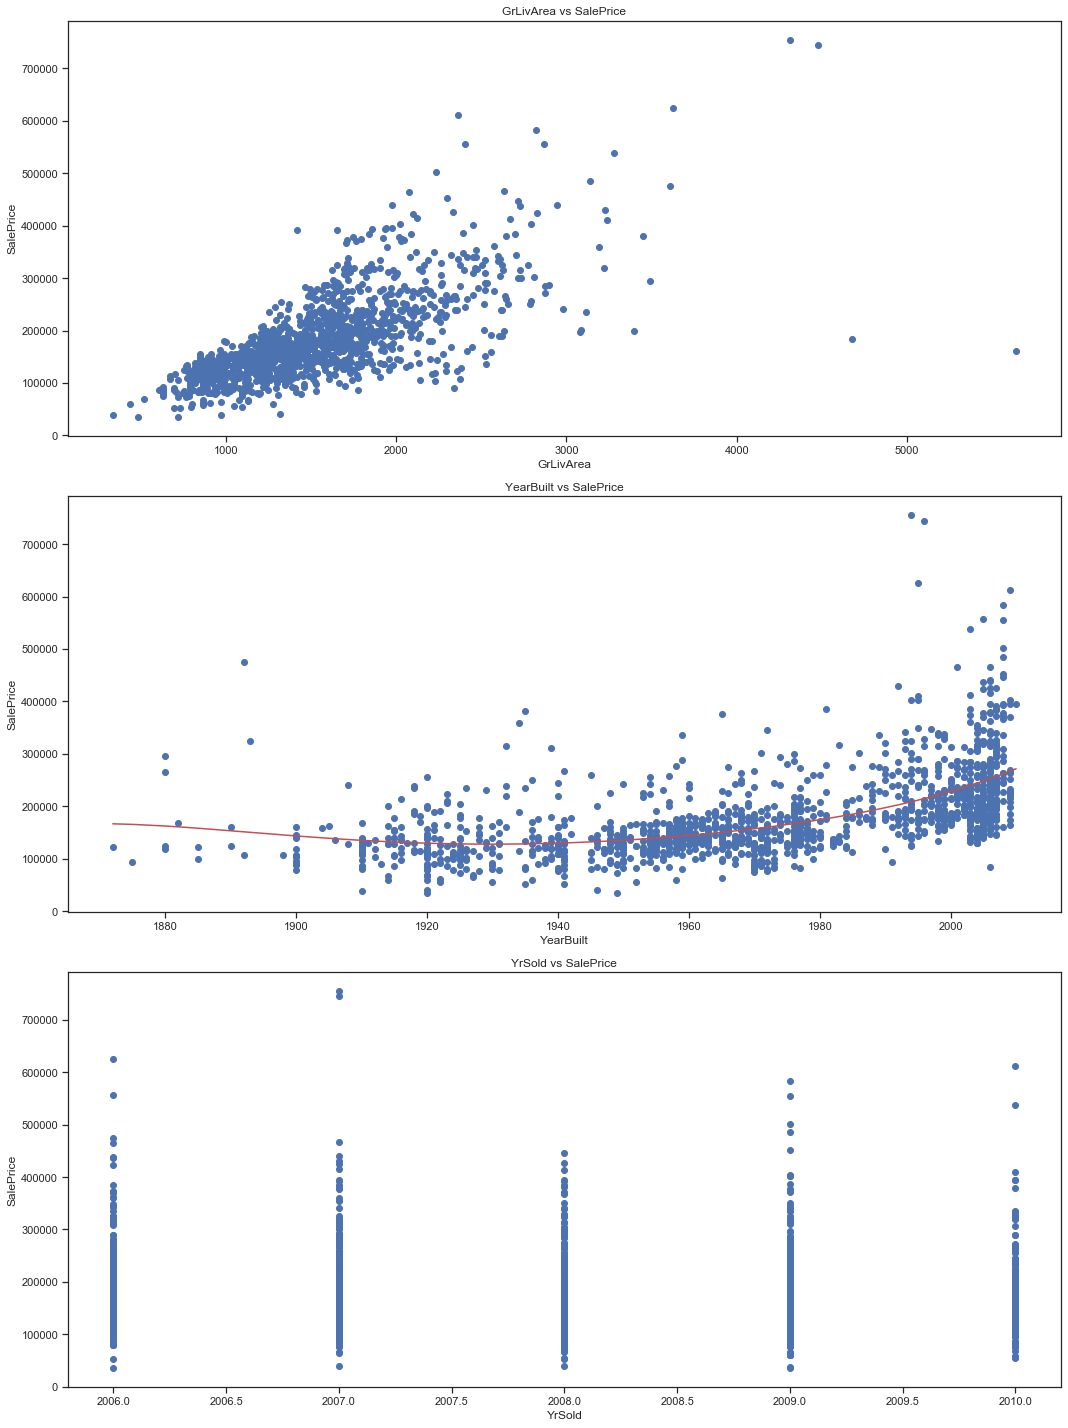

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

ax1.scatter(x='GrLivArea', y='SalePrice', data=df_train_keep)
ax1.set_title('GrLivArea vs SalePrice')
ax1.set_ylabel('SalePrice')
ax1.set_xlabel('GrLivArea')
#ax1.set_xlim(xmin=df_train_keep.GrLivArea.min())
#ax1.set_ylim(ymin=df_train_keep.SalePrice.min())
fig.tight_layout()

ax2.scatter(x='YearBuilt', y='SalePrice', data=df_train_keep)
ax2.set_title('YearBuilt vs SalePrice')
ax2.set_ylabel('SalePrice')
ax2.set_xlabel('YearBuilt')
# Fitting a least square polynomial curve to YearBuilt
poly = np.polyfit(df_train_keep['YearBuilt'], df_train_keep['SalePrice'], 5) # my choice for the degree of the polynomial is arbitrary right now
p = np.poly1d(poly) # this allows me to get values at arbitrary x values 
ax2.plot(df_train_keep['YearBuilt'].sort_values(), p(df_train_keep['YearBuilt'].sort_values()), 'r-')
# Fitting an exponential curve to YearBuilt
expo = np.exp(df_train_keep['YearBuilt'].sort_values()) + np.random.normal(0, 1) # This is all tweaking and is a terrible fit
ax2.plot(df_train_keep['YearBuilt'].sort_values(), expo, 'k*')
fig.tight_layout()


# Boxplot might be a better choice for YrSold vs SalePrice
ax3.scatter(x='YrSold', y='SalePrice', data=df_train_keep)
ax3.set_title('YrSold vs SalePrice')
ax3.set_ylabel('SalePrice')
ax3.set_xlabel('YrSold')
fig.tight_layout()

## Hypothesis Test: ANOVA - YrSold vs SalePrice
> Let's perform a hypothesis test out of interest. The Kaggle competition only cares about the price prediction accuracy, but seeing as I am trying to make this kernel reasonably well-rounded, I am going to delve into some superfluous statistical investigation here and there.
* **H0**: There is **no** statistically significant difference in SalePrice across YrSold.
* **H1**: There **is** statistically significant difference in SalePrice across YrSold.

> The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

    1. The samples are independent.
    2. Each sample is from a normally distributed population.
    3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.
> If these assumptions are not true for a given set of data, it may still be possible to use the Kruskal-Wallis H-test (scipy.stats.kruskal) although with some loss of power. 

> ANOVA link:  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

> Normality Test link: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

> ## ANOVA Assumption 1: Independence
* I am unsure here. Why? Because a house sold in year n may be again sold at year n+k or it may not, however, common sense tells us that a house sold at year n is more likely to be sold at year n+10 (for example), than a house sold at n+9. However, given the smaller timeframe of 5 years here, and given that I want to assess the other assumptions for practice, I am going to act as if independece has been satisfied for our samples.

> ## ANOVA Assumption 2: Normality of SalePrice across each YrSold
* Visual Checks : histogram, qqplot 
* Normality Tests: Shapiro-Wilk, Anderson-Darling

Statistics=0.869, p=0.000
S-W: SalePrice from 2006 does not look Gaussian (reject H0)
Statistic: 9.294
A-D: 15.000: 0.569, data does not look normal (reject H0)
A-D: 10.000: 0.648, data does not look normal (reject H0)
A-D: 5.000: 0.777, data does not look normal (reject H0)
A-D: 2.500: 0.907, data does not look normal (reject H0)
A-D: 1.000: 1.079, data does not look normal (reject H0)
Statistics=0.820, p=0.000
S-W: SalePrice from 2007 does not look Gaussian (reject H0)
Statistic: 11.885
A-D: 15.000: 0.569, data does not look normal (reject H0)
A-D: 10.000: 0.648, data does not look normal (reject H0)
A-D: 5.000: 0.778, data does not look normal (reject H0)
A-D: 2.500: 0.907, data does not look normal (reject H0)
A-D: 1.000: 1.079, data does not look normal (reject H0)
Statistics=0.921, p=0.000
S-W: SalePrice from 2008 does not look Gaussian (reject H0)
Statistic: 6.709
A-D: 15.000: 0.569, data does not look normal (reject H0)
A-D: 10.000: 0.648, data does not look normal (reject H0)


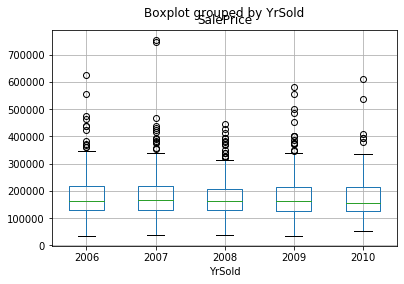

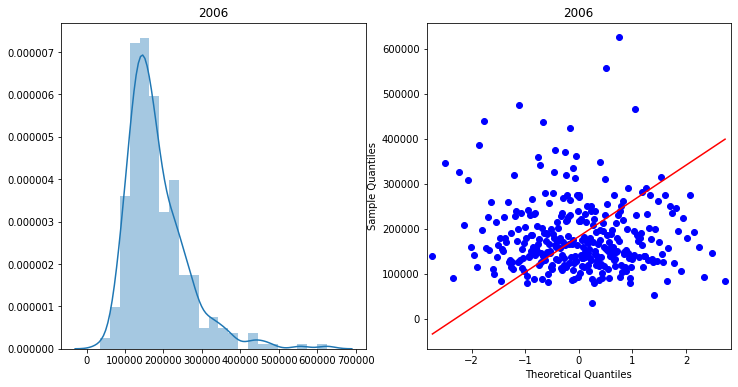

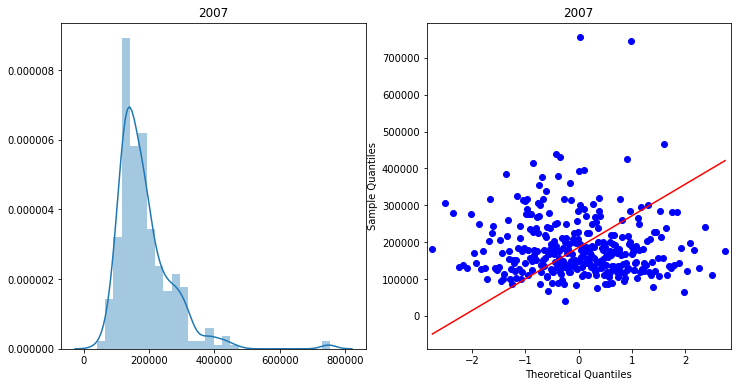

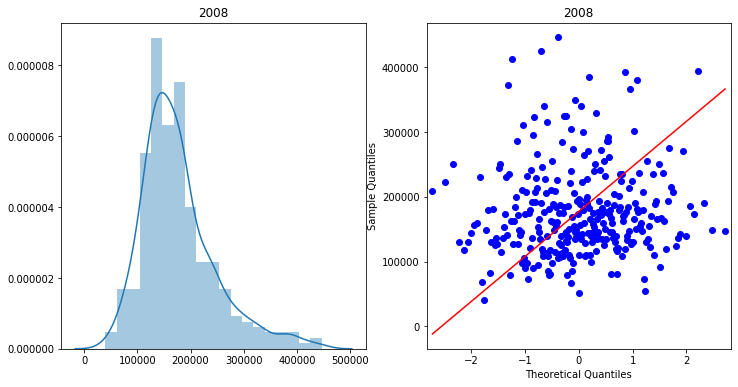

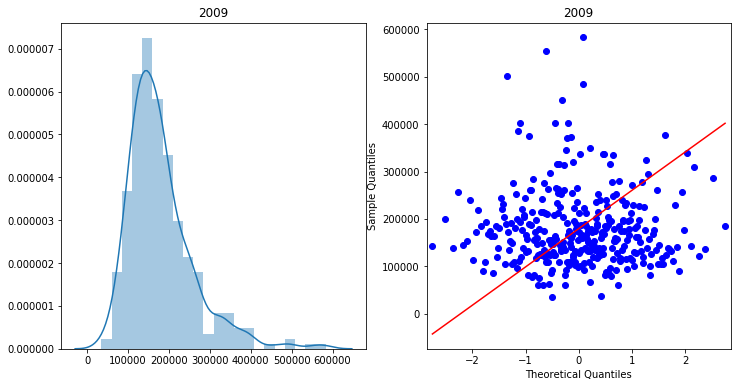

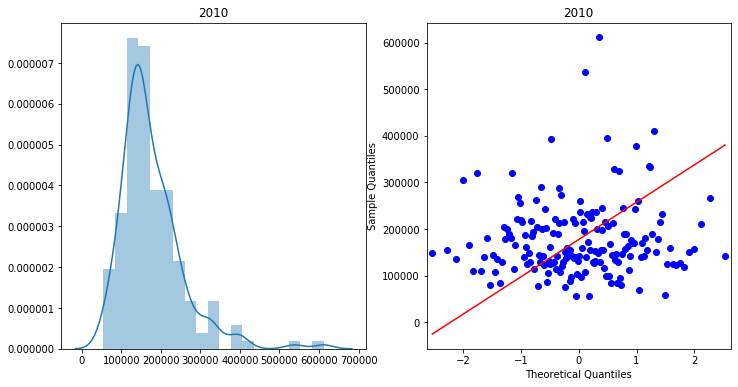

In [14]:
# Manually creating these to iterate through
YrSold_2006 = df_train_keep[df_train_keep['YrSold']== 2006]['SalePrice'].to_frame()
YrSold_2006 = YrSold_2006.rename(columns = {'SalePrice':'2006'})
YrSold_2007 = df_train_keep[df_train_keep['YrSold']== 2007]['SalePrice'].to_frame()
YrSold_2007 = YrSold_2007.rename(columns = {'SalePrice':'2007'})
YrSold_2008 = df_train_keep[df_train_keep['YrSold']== 2008]['SalePrice'].to_frame()
YrSold_2008 = YrSold_2008.rename(columns = {'SalePrice':'2008'})
YrSold_2009 = df_train_keep[df_train_keep['YrSold']== 2009]['SalePrice'].to_frame()
YrSold_2009 = YrSold_2009.rename(columns = {'SalePrice':'2009'})
YrSold_2010 = df_train_keep[df_train_keep['YrSold']== 2010]['SalePrice'].to_frame()
YrSold_2010 = YrSold_2010.rename(columns = {'SalePrice':'2010'})

df_train_keep.boxplot('SalePrice', by='YrSold')

# ANOVA assumption 2: Testing for normality of SalePrice across each YrSold
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, anderson
SalePrice_YrSold = [YrSold_2006, YrSold_2007, YrSold_2008, YrSold_2009, YrSold_2010]

for yr in SalePrice_YrSold:
    # Option a: Visual check for normality i.e histogram/distplot or qqplot
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    ax[0].set_title('{}'.format(yr.columns[0]))
    sns.distplot(yr, ax=ax[0])
    ax[1].set_title('{}'.format(yr.columns[0]))
    qqplot(yr, line='s', ax=ax[1])

    # Option b: Statistical test e.g. Shapiro-Wilk or Anderson-Darling
    # Shapiro-Wilk explained very well here: https://stats.stackexchange.com/questions/427797/what-is-a-lay-explanation-for-the-numerator-of-w-in-the-shapiro-wilk-test
    stat, p = shapiro(yr)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('S-W: SalePrice from {} looks Gaussian (fail to reject H0)'.format(yr.columns[0]))
    else:
        print('S-W: SalePrice from {} does not look Gaussian (reject H0)'.format(yr.columns[0])) 
        
    # Anderson-Darling (related to Kolmogorov-Smirnov)
    result = anderson(yr[yr.columns[0]]) # had to mess around to ensure that this fed in as an array. The docs suggest array req'd for shapiro also, but that worked fine on each 'yr' dataframe
    print('Statistic: %.3f' % result.statistic)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('A-D: %.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('A-D: %.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

> **Conclusion**: Clearly SalePrice is non-normal across each YrSold, so ANOVA assumption 2 is violated. ANOVA is not suitable here.

> ## ANOVA Assumption 3: Homoscedasticity 
* I will not test for this as Assumption 2 was violated. If the groups had exhibited normal distributions, then I would have used F-test of Equality of Variances

> As an alternative to an ANOVA, I shall plot confidence intervals of the mean SalePrice across YrSold 
* Given that SalePrice does not approximate a Gaussian distn, I will be using percentiles for the 95% confidence intervals: https://stackoverflow.com/questions/44603615/plot-95-confidence-interval-errorbar-python-pandas-dataframes/44605888)


<ErrorbarContainer object of 3 artists>

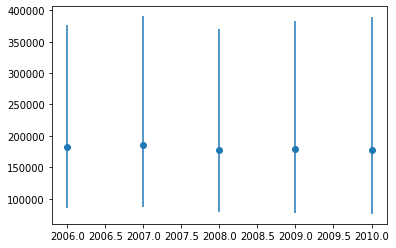

In [15]:
mean = df_train_keep.groupby('YrSold')['SalePrice'].mean()
# Want 95% confidence intervals (as the data is not normal, use percentiles: https://stackoverflow.com/questions/44603615/plot-95-confidence-interval-errorbar-python-pandas-dataframes/44605888)
p025 = df_train_keep.groupby('YrSold')['SalePrice'].quantile(0.025)
p975 = df_train_keep.groupby('YrSold')['SalePrice'].quantile(0.975)

plt.errorbar(
    mean.index,
    mean,
    #xerr=0.5,
    yerr=[mean - p025, p975 - mean],
    fmt='o'
)

**Conclusion**: Seeing as all the intervals overlap, there is no statistically significant difference in the mean SalePrice across YrSold. More research required to ensure that my understanding of my plot is correct, but this is the conclusion that I am going with.

# Investigation: Categorical Features

Looking at categorical features. I have a function whereby it is just as easy to plot all the categorical features at once so I will do that, but our main focus will be on thos features that **intuitively** would affect SalePrice (i.e. Neighborhood, OverallQual & OverallCond).

C:\Program Files\Python37\Lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Program Files\Python37\Lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Program Files\Python37\Lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.

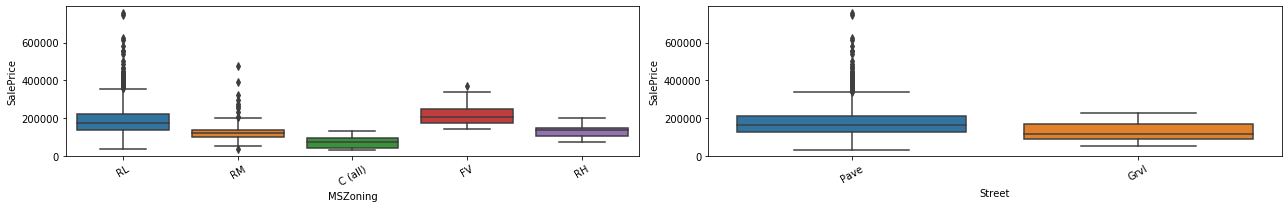

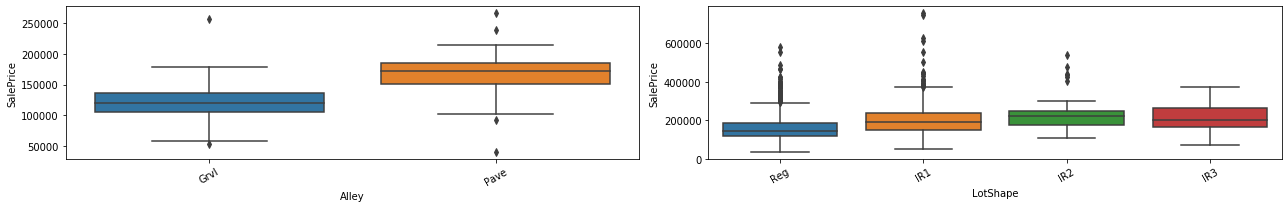

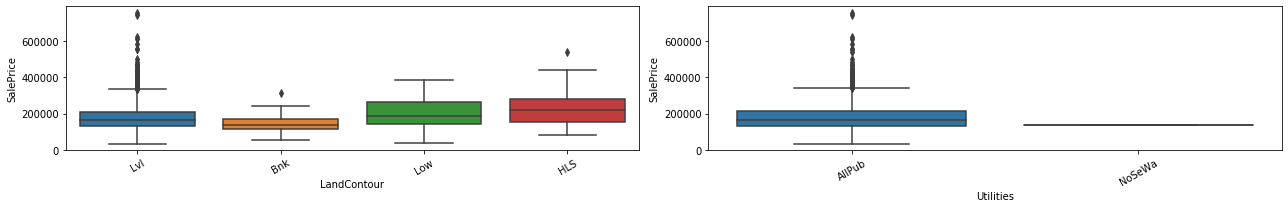

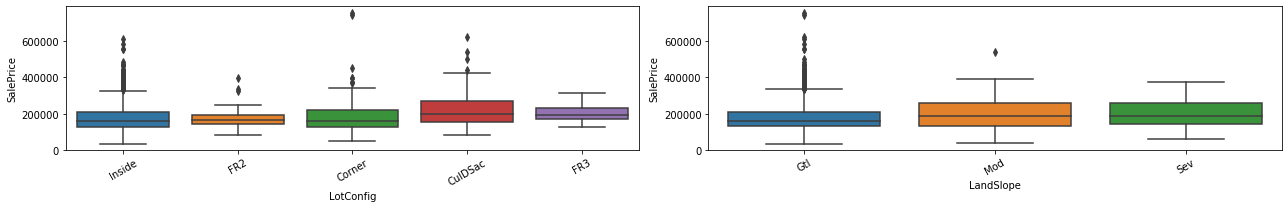

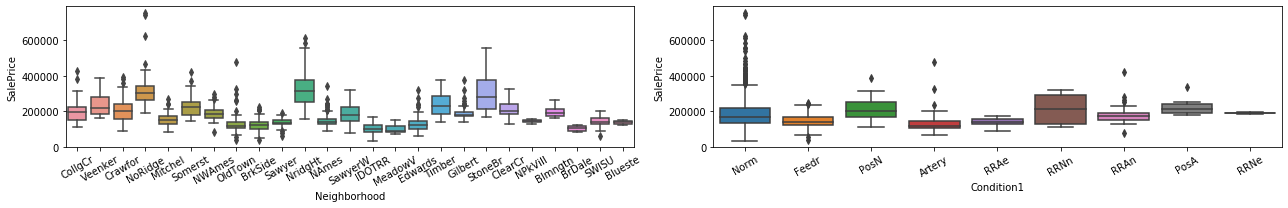

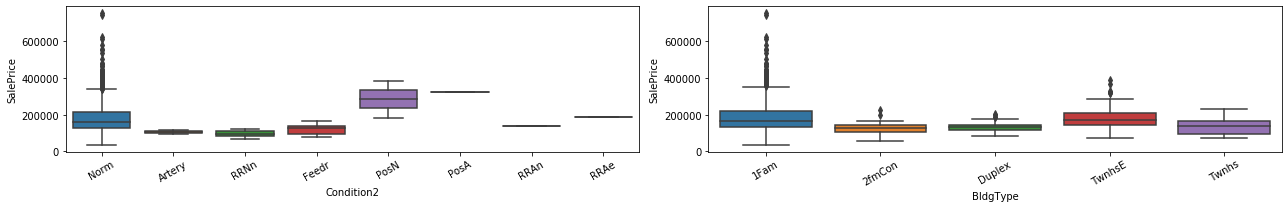

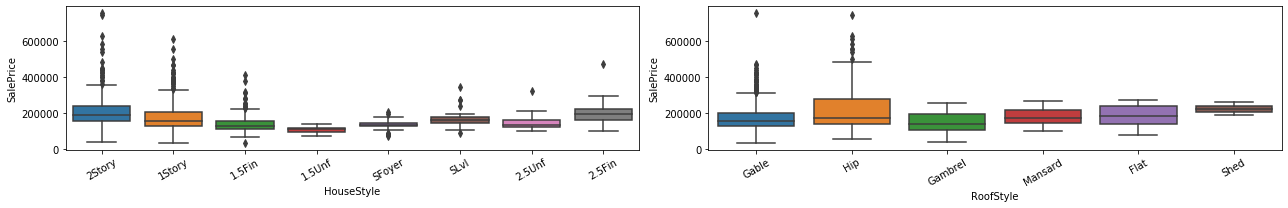

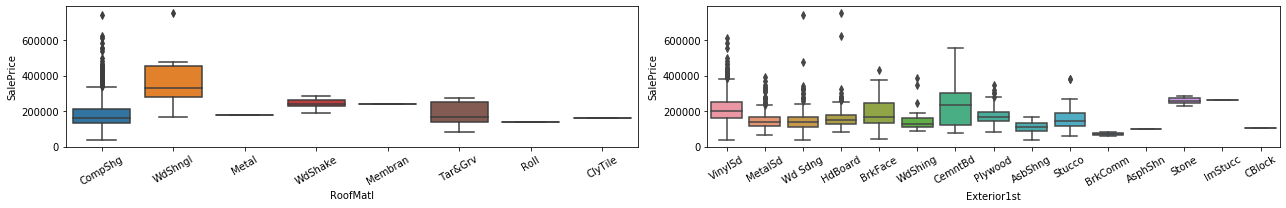

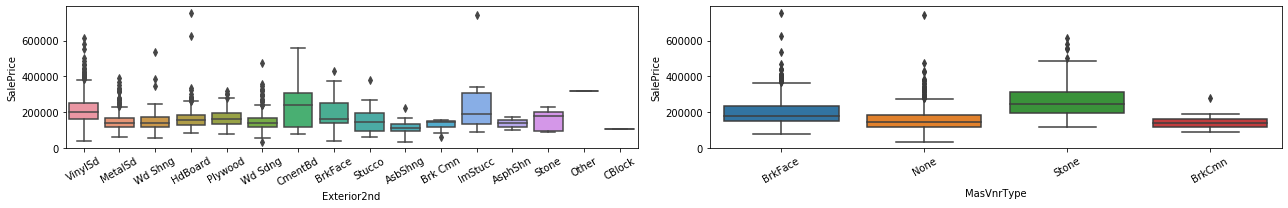

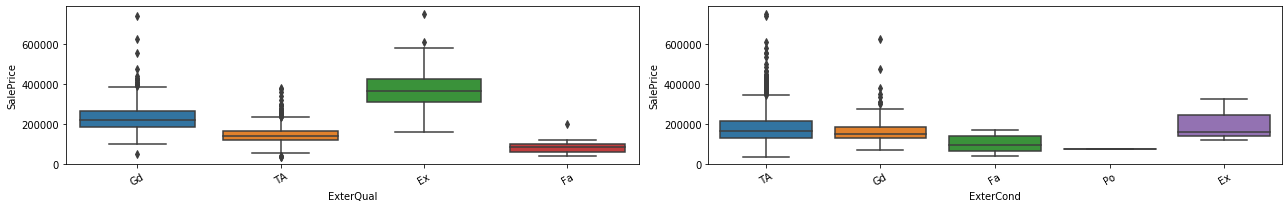

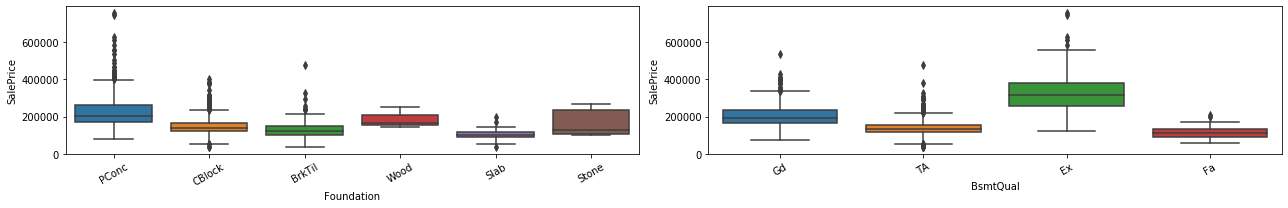

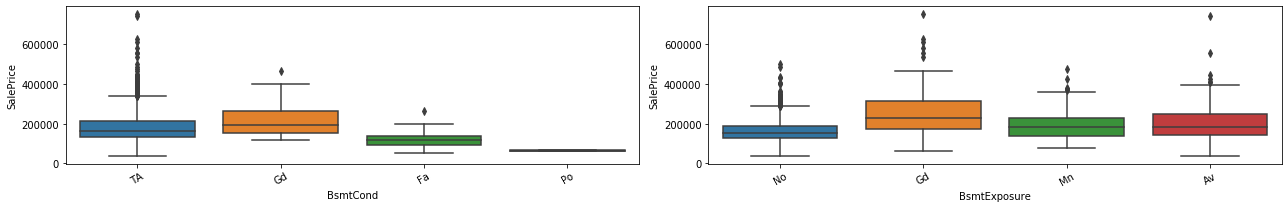

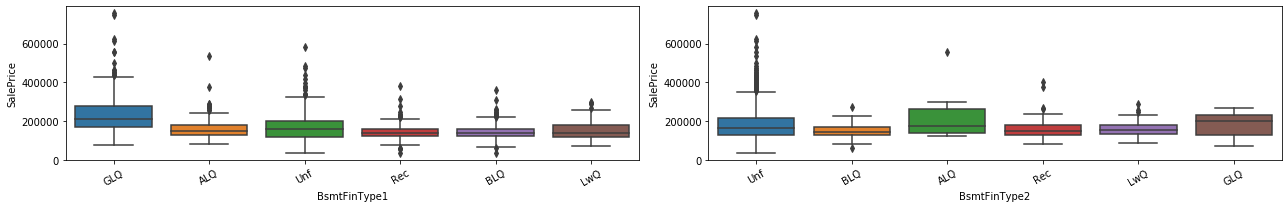

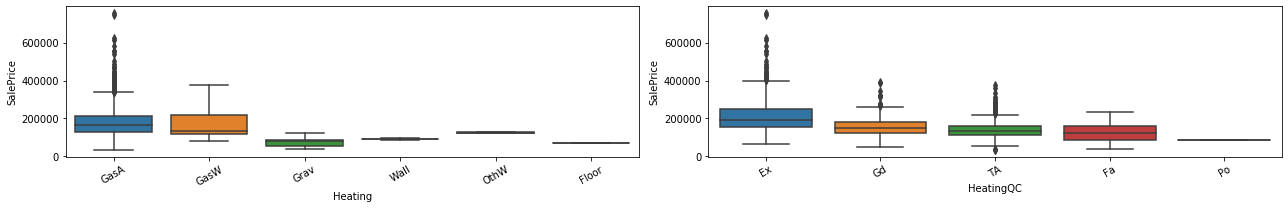

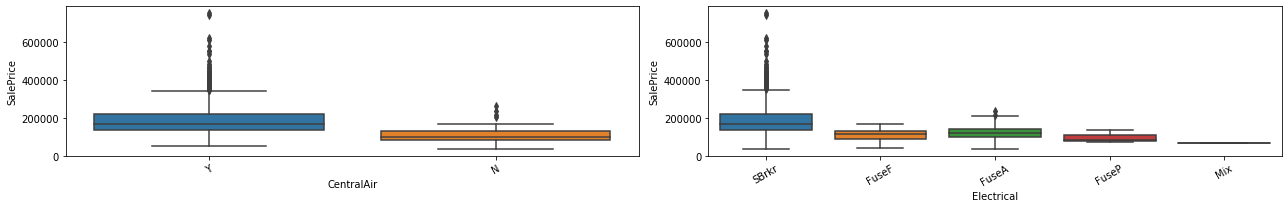

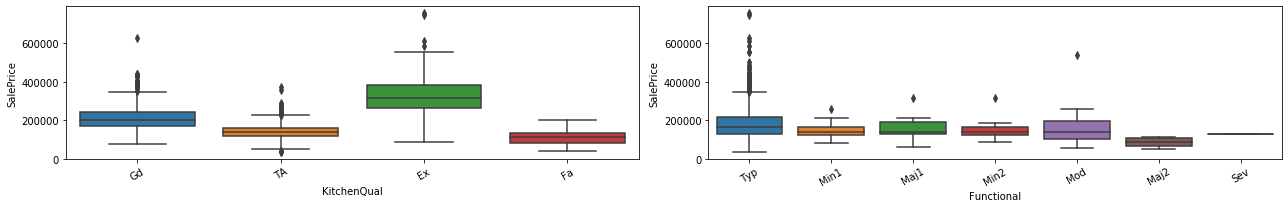

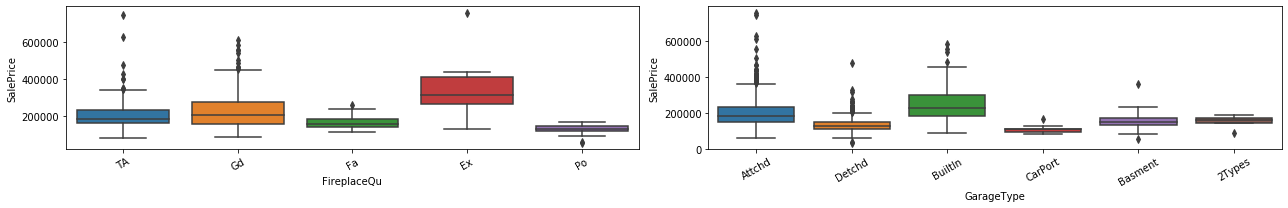

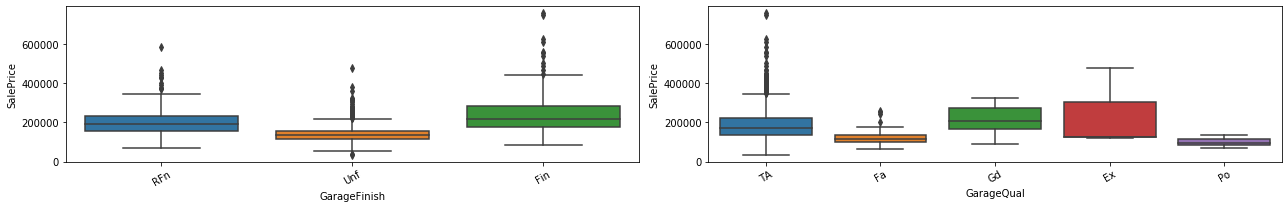

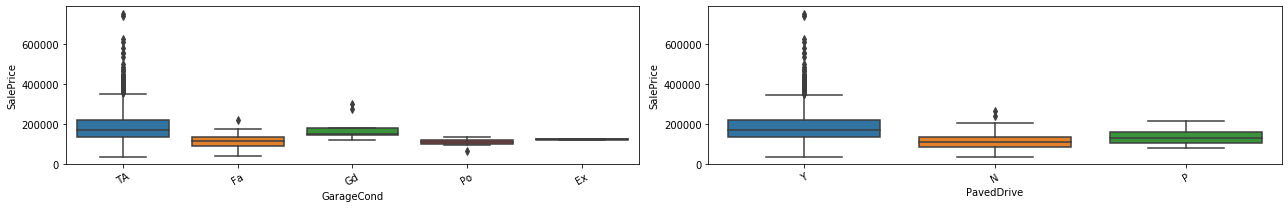

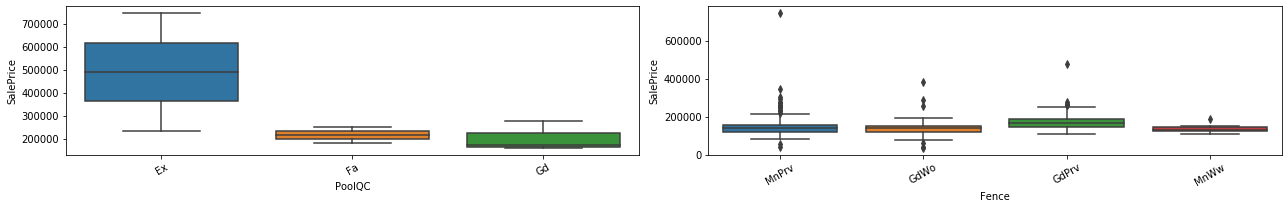

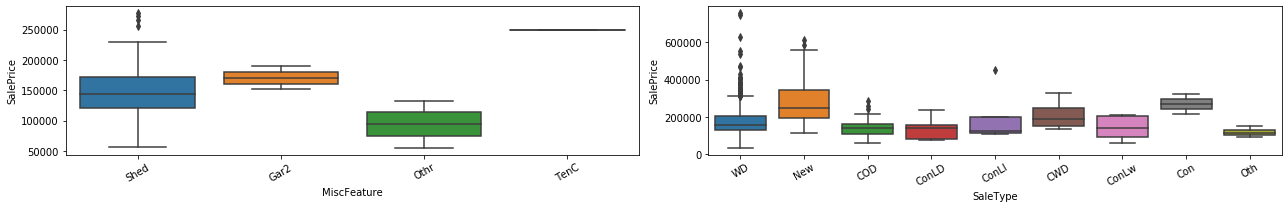

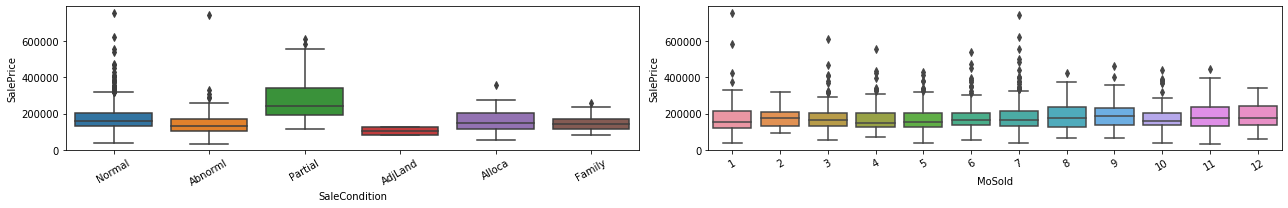

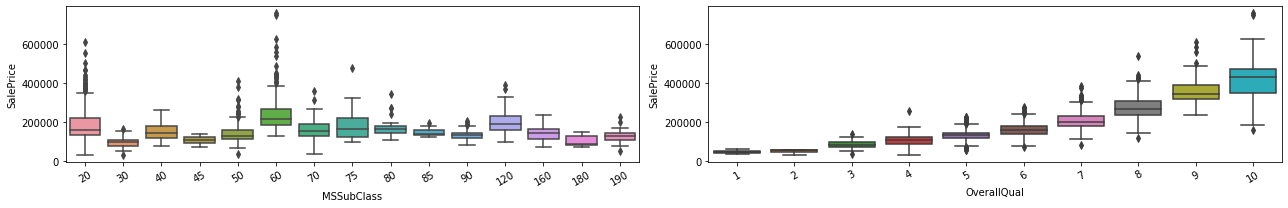

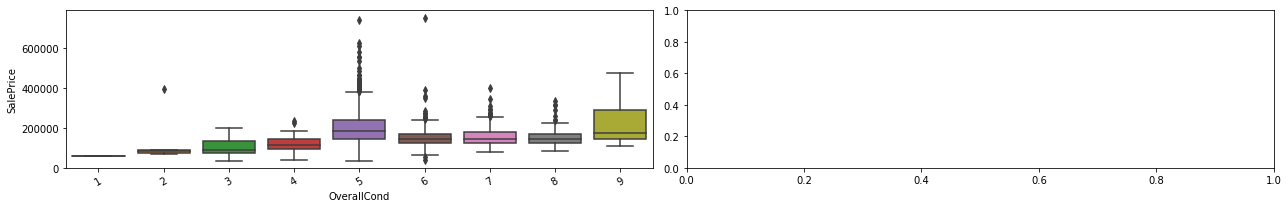

In [16]:
def chunks(a_list, num):
    # useful function to take a list, then to break that list into smaller lists of size num, creating a list of lists 
    return [a_list[i:i + num] for i in range(0, len(a_list), num)]
        
def boxplot(df, dep_var, cols, ncols):
    # useful function to boxplot multiple features against one e.g. IVs (cols) vs DV (dep_var)
    for lst in chunks(cols, ncols):
        fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(18, 3))
        for idx in range(0, len(lst)):
            attr = lst[idx]
            data = pd.concat([df[dep_var], df[attr]], axis=1)
            sns.boxplot(x=attr, y=dep_var, data=data, ax=axes[idx])
            axes[idx].set_xticklabels(axes[idx].get_xticklabels(),rotation=30)
        plt.tight_layout() # deals with white space

# Visualise categorical variables by boxplotting everything
boxplot(df_train_keep, 'SalePrice', nominal_categorical + ordinal_categorical, 2) # chunks function helps me to create lists of size 2 within the bigger list, thus having two plots side by side all the way down.

Comments on the above boxplots
> Based on eyeballing the boxplots, SalePrice is affected by different categories across the following features: Alley, Neighborhood, RoofMatl, ExterQual, BsmtQual, KitchenQual, FireplaceQu, PoolQC, **OverallQual**, OverallCond. More stringent investigation is required here.

# Outliers (Not touching for now)
> My intention is to work through and model with all outliers in first. Then I will remove some outliers based on multivariate/univariate measures and repeat modelling. In addition, the person who collected the data mentioned removing a few specific data points (based on GrLivArea, I think) in his write up on the data, so I will give this a look too.

In [17]:
'''# Looking for outliers (in GrLivArea only for now), as indicated in brief by the data collector - https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(df_train_keep.GrLivArea,df_train_keep.SalePrice)
plt.title("Looking for Outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
# Leaving outliers in for now, will come back to deal with them after as it is quite involved to do it properly.
# Question: Do I boxplot each numerical feature and set threshold at Q3 + 1.5*IQR? Before imputing and/or after? How do I deal with categorical features? I could use z-score if distn of the feature is normal?!
'''

'# Looking for outliers (in GrLivArea only for now), as indicated in brief by the data collector - https://ww2.amstat.org/publications/jse/v19n3/decock.pdf\nplt.scatter(df_train_keep.GrLivArea,df_train_keep.SalePrice)\nplt.title("Looking for Outliers")\nplt.xlabel("GrLivArea")\nplt.ylabel("SalePrice")\n# Leaving outliers in for now, will come back to deal with them after as it is quite involved to do it properly.\n# Question: Do I boxplot each numerical feature and set threshold at Q3 + 1.5*IQR? Before imputing and/or after? How do I deal with categorical features? I could use z-score if distn of the feature is normal?!\n'

In [18]:
'''# Eyeballing numerical features for outliers - a lot of this window of code is from http://www.shihaiyang.me/2018/04/16/house-prices/
numerical_cols = discrete + continuous
numerical_cols.remove('SalePrice')
data = pd.concat([df_train['SalePrice'], df_train[numerical_cols]], axis=1)

for lst in chunks(numerical_cols, 5):
    sns.pairplot(data, y_vars=['SalePrice'], x_vars=lst)

#--------- alternative way of doing the above, just leaving here for future reference/ learning
# When calling chunks function with sns.pairplot as I just did, it is much to same as this code:
df_train_keep_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8 )
#-----------

# The below are examples of where you can eyeball the cutoff for outliers. I will move on to a technical method in the next few sections though, as simply eyeballing does not satisfy my suspicions
# outliers = {"LotFrontage":250, "LotArea": 150000, "BsmtFinSF1": 4000, "TotalBsmtSF": 6000, 
#            "1stFlrSF": 4000, "GrLivArea": 5000, "MiscVal": 100000}

# if you want to use these eyeballed cutoffs (or list other cutoffs from the technical methods), the below function would prove useful:
# clean outliers
def clean_outliers(df, outliers):
    for col in outliers:
        df = df[df[col] < outliers[col]]
    return df

# print("Before cleaning: %d" % len(df_train))
# df_train = clean_outliers(df_train, outliers)
# print("After cleaning: %d" % len(df_train))'''

'# Eyeballing numerical features for outliers - a lot of this window of code is from http://www.shihaiyang.me/2018/04/16/house-prices/\nnumerical_cols = discrete + continuous\nnumerical_cols.remove(\'SalePrice\')\ndata = pd.concat([df_train[\'SalePrice\'], df_train[numerical_cols]], axis=1)\n\nfor lst in chunks(numerical_cols, 5):\n    sns.pairplot(data, y_vars=[\'SalePrice\'], x_vars=lst)\n\n#--------- alternative way of doing the above, just leaving here for future reference/ learning\n# When calling chunks function with sns.pairplot as I just did, it is much to same as this code:\ndf_train_keep_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8 )\n#-----------\n\n# The below are examples of where you can eyeball the cutoff for outliers. I will move on to a technical method in the next few sections though, as simply eyeballing does not satisfy my suspicions\n# outliers = {"LotFrontage":250, "LotArea": 150000, "BsmtFinSF1": 4000, "TotalBsmtSF": 6000, \n#            "1stFlrS

In [19]:
'''# Looking at numerical outliers using Q1-1.5*IQR | Q3+1.5*IQR
numcols_outliers = df_train_keep.columns[df_train_keep.dtypes != object]
df_train_keep_num_outliers = df_train_keep[numcols_outliers] # this df contains all the numerical columns in the dataset, we will comb through it for outliers below
Q1 = df_train_keep_num_outliers.quantile(0.25)
Q3 = df_train_keep_num_outliers.quantile(0.75)
IQR = Q3 - Q1
print(IQR) # 0's here could be problematic, but they are legitimate and are not due to nan's. For example, see that GarageYrBlt has nan's but the IQR is still calculated as 41.

(df_train_keep_num_outliers < (Q1 - 1.5 * IQR)) | (df_train_keep_num_outliers > (Q3 + 1.5 * IQR)) # every cell that says true is an outlier based on IQR'''

"# Looking at numerical outliers using Q1-1.5*IQR | Q3+1.5*IQR\nnumcols_outliers = df_train_keep.columns[df_train_keep.dtypes != object]\ndf_train_keep_num_outliers = df_train_keep[numcols_outliers] # this df contains all the numerical columns in the dataset, we will comb through it for outliers below\nQ1 = df_train_keep_num_outliers.quantile(0.25)\nQ3 = df_train_keep_num_outliers.quantile(0.75)\nIQR = Q3 - Q1\nprint(IQR) # 0's here could be problematic, but they are legitimate and are not due to nan's. For example, see that GarageYrBlt has nan's but the IQR is still calculated as 41.\n\n(df_train_keep_num_outliers < (Q1 - 1.5 * IQR)) | (df_train_keep_num_outliers > (Q3 + 1.5 * IQR)) # every cell that says true is an outlier based on IQR"

### Outliers continued: Mahalanobis Distance: https://www.machinelearningplus.com/statistics/mahalanobis-distance/

# Missing Values

Handling nans in df_train_keep
> I **impute** all columns except for LotFrontage using one useful function
* Important note here: Imputing with "None" is ok for now, but this ties into my manual replacements in the next few windows where I value "None" to be 0 in order to make sure nothing slips through the cracks
* In reality, I could set "None" equal to the mean in some of the below replacements, but I haven't given that much thought yet!

> I perform some deeper analysis on LotFrontage before imputing, because intuitively it makes sense that LotFrontage may vary with neighborhood. Note: This did not turn out to be the case following my analysis below)


In [20]:
df_train_keep_missing = df_train_keep.loc[:, df_train_keep.isnull().sum() > 0].columns # Creating an object which lists the column names that have missing values

df_train_keep_imputed = df_train_keep.copy() # Setting up a dataframe that will be used for imputation

def impute(df, ad_hoc_list=[]):
    # Imputing using this function based on column type. This is not done arbitrarily, I looked into each of the features and decided that "None"/0 was not an unreasonable idea.
    # I should look into using means/modes also, but that could be on an ad-hoc basis.
    for col in df.loc[:, df.isnull().sum() > 0].columns:
        if col not in ad_hoc_list:
            if df.loc[:, col].dtype == object:
                df.loc[:, col] = df.loc[:, col].fillna("None")
            elif (df.loc[:, col].dtype == int) | (df.loc[:, col].dtype == float):
                df.loc[:, col] = df.loc[:, col].fillna(0)

impute(df_train_keep_imputed, ['LotFrontage']) # imputing all cols except for LotFrontage

# LotFrontage
# Checking to see if I can find any correlation between missing LotFrontage and neighborhood
hood = []
for i in range(0, len(df_train_keep_imputed)):
    if math.isnan(df_train_keep_imputed.iloc[i]['LotFrontage']):
        hood.append(df_train_keep_imputed.iloc[i]['Neighborhood'])
np.unique(hood, return_counts=True) # nothing obvious from this. 

# Imputing LotFrontage by giving avg of neighborhood to each house
LF_hood = df_train_keep_imputed.groupby(df_train_keep_imputed["Neighborhood"], as_index=True)['LotFrontage'].mean() # group df_train by Neigborhood and calc the mean of LotFrontage across the group
LF_dict = {} # Using a dict because, below, it allows me to plug in the mean LotFrontage (value) based on Neigborhood (key) when LotFrontage is missing 
for i in range(0, len(LF_hood)):
    LF_dict[LF_hood.index[i]] = LF_hood.iloc[i]

for i in range(0, len(df_train_keep_imputed)):
    if math.isnan(df_train_keep_imputed.iloc[i]['LotFrontage']):
        df_train_keep_imputed.loc[i,'LotFrontage'] = LF_dict[df_train_keep_imputed.iloc[i]['Neighborhood']]  # Note that <<df_train.iloc[i]['LotFrontage'] = test_dict[df_train.iloc[i]['Neighborhood']]>> does not work as it creates a copy due to chained indexing (https://www.dataquest.io/blog/settingwithcopywarning/). .loc is useful here (https://stackoverflow.com/questions/46113078/pandas-add-value-at-specific-iloc-into-new-dataframe-column)

Having imputed in a general way to get rid of nans, I now need to do **some ad-hoc mapping**.

In [21]:
# Some numerical features are actually really categories (which means we will convert back to categories and then one-hot encode so that the numebrs don't have ordered meaning, that's my understanding as of 17/10/19, at least!)
df_train_keep_imputed = df_train_keep_imputed.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                                                        "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                                                    7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                                                       }) # Now, MSSubClass and MoSold are changed from dtype int64 to dtype Object in df_train_keep_imputed
 
df_train_keep_imputed = df_train_keep_imputed.replace({"BsmtExposure" : {"No":"None"}}) # specific mapping to bring everything to "None" for BsmtExposure as there was a mix of "No" and "None" originally

# Encode some categorical features as ordered numbers when there is information in the order (I can't remember exactly, because I did this a while ago, but I believe that this is detailed in documentation or else just obvious that "Gd" means Good etc.)
# As mentioned before, setting "None" to be 0 each time below may not be the best bet. Another option would be to set None equal to the mean/mode, particularly when dealing with "qual*" features
df_train_keep_imputed = df_train_keep_imputed.replace({
                                                       "Alley" : {"None" : 0, "Grvl" : 1, "Pave" : 2}, # Not sure if encoding levels into Alley like this makes sense - check boxplots to see if there is a difference in levels? Otherwise just OHE
                                                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                                       "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                                                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                                                         "ALQ" : 5, "GLQ" : 6},
                                                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                                                         "ALQ" : 5, "GLQ" : 6},
                                                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                                                       "ExterCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                                                       "ExterQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                                                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                                       "Functional" : {"None" : 0,"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                                                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                                       "HeatingQC" : {"None" : 0,"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                                       "KitchenQual" : {"None" : 0,"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                                       "LandSlope" : {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                                                       "LotShape" : {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                                                       "PavedDrive" : {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                                                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                                                       "Street" : {"None" : 0, "Grvl" : 1, "Pave" : 2}, # Not sure if encoding levels into Street like this makes sense - check boxplots to see if there is a difference in levels? Otherwise just OHE
                                                       "Utilities" : {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}
                                                       }) 
# Unfortunately, replacing an object with an integer does not change the dtype of the column. I think this is because all ints can be object, but all objects (e.g. string) cannot be ints.
# Thus an extra piece is required here whereby I manually change all of these column types from object to int 
change_cols = ["Alley", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtQual", "ExterCond", "ExterQual", "FireplaceQu", "Functional", "GarageCond",
               "GarageQual", "HeatingQC", "KitchenQual", "LandSlope", "LotShape", "PavedDrive", "PoolQC", "Street", "Utilities"]  
for col in change_cols:
    df_train_keep_imputed[col] = df_train_keep_imputed[col].astype(int)

print("There is/are {} null(s).".format(df_train_keep_imputed.isnull().sum().sum())) # Ensure that there are no more nulls

There is/are 0 null(s).


At this point, **df_train_keep_imputed** is the dataframe I am moving forward with. All numerical columns have been imputed, categorical features still need to be dealt with. This will be done very shortly. But first, I may take a look at the correlation heatmaps again, now that we have imputed our numerical features.

# Rechecking Correlation After Imputing (Skipping for now)

I assume that there should not be any significant differences between correlations before and after performing imputation. Honestly, this is based on intuition, I have not seen anybody do this.

# Preparing the Categorical Features for Encoding
> Check what needs to be one-hot encoded
> * All nominal categorical features need to be encoded (my personal view). 
* Note that the ordinal categorical features have been changed into numerical features as necessary, so they no longer have type 'object'. Thus, by filtering for columns of type 'object', I only get nominal categorical features as desired.

> I will then make two separate df's:
* One that has only columns that **need to be encoded** i.e. **df_train_keep_imputed_to_encode**
* Another which has only the columns that **do not** require any encoding i.e. **df_train_keep_imputed_num**


In [22]:
# Making two separate df's
df_train_keep_imputed_to_encode = df_train_keep_imputed.select_dtypes(include = ['object'])
df_train_keep_imputed_num = df_train_keep_imputed.drop([col for col in list(df_train_keep_imputed.select_dtypes(include = ['object']).columns)], axis=1) # I did not overwrite df_train_keep_imputed in case I want to jump back to it at any point.

Note to self: Kil, you should take a closer look @ the categorical vars. Just going to one-hot-encode for now. 17/10/2019

# One-Hot Encoding
> I create two different versions of the encoded dataframe:
* One with all dummy variables (to be used when fitting most ML models)
* One with the first dummy variable of **each** encoded category dropped (to be used with linear regression in order to avoid multicollinearity)

> Continuing with those two different dataframes, I concat each with the portion of my training/validation data that did not need to be encoded i.e. **df_train_keep_imputed_num**

> I then separate out our target variable, SalePrice, into it's own df and simply return the sizes of the dataframes

In [23]:
df_train_keep_imputed_encoded = pd.get_dummies(df_train_keep_imputed_to_encode) 
df_train_keep_imputed_encoded_drop_dummy = pd.get_dummies(df_train_keep_imputed_to_encode, drop_first=True) # creating this dataset to be used with regression whereby one doesn't want to fall into the dummy variable trap.

# Join categorical and numerical features
df_train_keep_imputed_ready = pd.concat([df_train_keep_imputed_encoded, df_train_keep_imputed_num], axis=1)
df_train_keep_imputed_ready_drop_dummy = pd.concat([df_train_keep_imputed_encoded_drop_dummy, df_train_keep_imputed_num], axis=1)

# Putting SalePrice into it's own df and dropping
y = df_train_keep_imputed_ready['SalePrice']
df_train_keep_imputed_ready.drop(['SalePrice'], axis=1, inplace=True)
df_train_keep_imputed_ready_drop_dummy.drop(['SalePrice'], axis=1, inplace=True)

print("New number of features : " + str(df_train_keep_imputed_ready.shape[1])) # 255 features 
print("New number of features with first dummy dropped for each nominal categorical feature : " + str(df_train_keep_imputed_ready_drop_dummy.shape[1])) # 230 features

New number of features : 255
New number of features with first dummy dropped for each nominal categorical feature : 230


# Comments on Standardising (But not actually standardising...yet!)
The below cell deals with standardising/centering, so I just want to make a few notes on that while they are in my head

Note: Standardizing consists of subtracting the mean and dividing by the standard deviation i.e. normalising (around 0). Centering consists of subtracting the mean only.

See this link for a detailed discussion (some of the examples in chemistry etc given are beyond me for now): https://stats.stackexchange.com/questions/19216/variables-are-often-adjusted-e-g-standardised-before-making-a-model-when-is

Big Picture: 
> * Standardisation is not usually detrimental to model performance, see above link for times when it can be. 
* A common downside is that it changes the interpretation of the physical quantities in the model.
* Don't standardise unless you need to e.g. when dealing with variables that have different magnitudes and your model solves using distance metrics (such as KNN because different magnitudes will skew results) or your model solves using gradient descent (as different magnitudes will lead to slower or ulimately poorer optimisation. In terms of countour plots, you want a perfect bowl rather than an elongated bowl shaped like a currach)

Specific to linear regression:
> * I see no reason to standardise once features are on scales of similar magnitude
* Centering (and I assume standardising) leads to a different interpretation of the intercept. Before centering, the intercept is the predicted value when the features are all set to 0. However, when the features are all centred around 0, the intercept is then interpreted to be the predicted value when the features all take on their mean value : https://stats.stackexchange.com/questions/29781/when-conducting-multiple-regression-when-should-you-center-your-predictor-varia

# Cleaning the Test Set (Work required here)
> I will break this up into three windows and mimic the relevant Train workflow as closely as possible

## Cleaning Test - Step 1: Creating Separate Numerical and Categorical Dataframes

In [24]:
df_test_keep = df_test.copy()

# Check for dupes in 'Id' to ensure that our models aren't going to learn based on the same house multiple times
ids_unique = len(set(df_test_keep.Id))
ids_total = df_test_keep.shape[0]
ids_dupe = ids_total - ids_unique
print("There are " + str(ids_dupe) + " duplicate IDs for " + str(ids_total) + " total entries")
if(ids_dupe == 0):
    df_test_keep.drop(['Id'], axis=1, inplace=True)
else:
    print("Potential issue: %s Id's are duped. Please investigate further." % (ids_dupe))

# Creating a numerical and categorical dataframe
df_test_keep_num = df_test_keep.loc[:, (df_test_keep.dtypes == 'float64') | (df_test_keep.dtypes == 'int64')] # equivalent to df_test_keep_num = df_test_keep.select_dtypes(include = ['float64', 'int64'])
df_test_keep_num = df_test_keep_num.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold'], axis = 1) # inplace = True throws warnings here so I'm simply avoiding it for now

df_test_keep_cat = df_test_keep.loc[:, df_test_keep.dtypes == object]
df_test_keep_cat = pd.concat([df_test_keep_cat, df_test_keep.loc[:, ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']]], axis = 1)

There are 0 duplicate IDs for 1459 total entries


## Cleaning Test - Step 2: Handling Missing Values and Ad-hoc Encoding/Mapping
> Extra step: Checking for cols that have missing vals in Test but not in Train. I will need to look into these rather than blindly imputing, because I did not investigate these columns when imputing on the Train Set 

> * Note that most of my imputing is just inputting 0 or "None" as per train set
* When imputing LotFrontage on the test set, I use data from the train set for imputing.
* My understanding is that you should always use data from the training set to impute, and not calculate new means from the test set.

In [25]:
# Making a dataframe with the columns that have missing values
df_test_keep_missing = df_test_keep.loc[:, df_test_keep.isnull().sum() > 0].columns

# Extra step: Checking for cols that have missing vals in test but not in train.
cols_filled_in_X_train_not_in_df_test = [col for col in df_test_keep_missing if col not in df_train_keep_missing]
print("These columns {} require more investigation as they are not missing in train but are missing in test".format(cols_filled_in_X_train_not_in_df_test))

# Setting up a dataframe that will be used for imputation
df_test_keep_imputed = df_test_keep.copy()

These columns ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType'] require more investigation as they are not missing in train but are missing in test


* I am going to **impute** the colums in **cols_filled_in_X_train_not_in_df_test** with their **means or modes** depending if they are of **type** float/int or object, respectively.
* I appreciate that this is different to anything I have done so far, but I will likely rewrite the imputation of the train set to impute using mean/mode instead of None/0 in all honesty.


In [26]:
def impute_mean_mode(df, ad_hoc_list=[]):
    # Imputing using this function based on column type
    for col in df.loc[:, df.isnull().sum() > 0].columns:
        if col not in ad_hoc_list:
            if df[col].dtype == object:
                df.loc[:, col].fillna(df[col].mode()[0], inplace=True) # note the 0 index here because .mode() returns a series unlike .mean()
            else: # I don't see a need to check for int or float as once it falls through type == object, it has no other type option, as far as I know
                df.loc[:, col].fillna(df[col].mean(), inplace=True)
                
# Check for nulls before imputing cols_filled_in_X_train_not_in_df_test
if df_test_keep_imputed.drop('LotFrontage', axis=1).isnull().sum().sum() > 0: # LotFrontage being dealt with separately as in training 
    impute_mean_mode(df_test_keep_imputed, ['LotFrontage'])
    
# Check for nulls after imputing cols_filled_in_X_train_not_in_df_test
if df_test_keep_imputed.drop('LotFrontage', axis=1).isnull().sum().sum() > 0:
    print("The imputing function did not get rid of all nans. {} nans still remaining.".format(df_test_keep_imputed[cols_filled_in_X_train_not_in_df_test].isnull().sum().sum()))

# Imputing LotFrontage by giving avg of neighborhood (importantly, from train set!!) to each house
for i in range(0, len(df_test_keep_imputed)):
    if math.isnan(df_test_keep_imputed.iloc[i]['LotFrontage']):
        df_test_keep_imputed.loc[i,'LotFrontage'] = LF_dict[df_train_keep_imputed.iloc[i]['Neighborhood']]

# Some numerical features are actually really categories (which means we will convert back to categories and then one-hot encode so that the numebrs don't have ordered meaning, that's my understanding as of 17/10/19, at least!)
df_test_keep_imputed = df_test_keep_imputed.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
  50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
  80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
  150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
  "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
    7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
})

df_test_keep_imputed = df_test_keep_imputed.replace({"BsmtExposure" : {"No":"None"}}) # specific mapping to bring everything to "None" for BsmtExposure as there was a mix of "No" and "None" originally. I should change all "No's to "None" as that would be more robust than running into issues and then having to look for where the "No" is

# Encode some categorical features as ordered numbers when there is information in the order (I can't remember exactly, because I did this before, but I assume this is detailed in documentation or else just obvious that "Gd" means Good etc.)
df_test_keep_imputed = df_test_keep_imputed.replace({
                                                       "Alley" : {"None" : 0, "Grvl" : 1, "Pave" : 2}, # Not sure if encoding levels into Alley like this makes sense - check boxplots to see if there is a difference in levels? Otherwise just OHE
                                                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                                       "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3}, 
                                                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                                                         "ALQ" : 5, "GLQ" : 6},
                                                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                                                         "ALQ" : 5, "GLQ" : 6},
                                                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                                                       "ExterCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                                                       "ExterQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                                                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                                       "Functional" : {"None" : 0,"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                                                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                                       "HeatingQC" : {"None" : 0,"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                                       "KitchenQual" : {"None" : 0,"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                                       "LandSlope" : {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                                                       "LotShape" : {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                                                       "PavedDrive" : {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                                                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                                                       "Street" : {"None" : 0, "Grvl" : 1, "Pave" : 2}, # Not sure if encoding levels into Street like this makes sense - check boxplots to see if there is a difference in levels? Otherwise just OHE
                                                       "Utilities" : {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}
                                                       }) 

# Manually changing dtyes of some manually encoded columns from objects to ints so that they will not be read in to the One-Hot-Encoding portion below
for col in change_cols: # change_cols is defined from the preprocessing of the Train Set
    df_test_keep_imputed[col] = df_test_keep_imputed[col].astype(int)

# Ensure that there are no more nulls
print("There are {} nulls in test.".format(df_test_keep_imputed.isnull().sum().sum()))

There are 0 nulls in test.


## Cleaning Test - Step 3: Encoding, Concatenating and Defining 

In [27]:
# Making two separate df's, one that has only columns that need encoding, and the other which has only the columns that does not require any encoding
df_test_keep_imputed_to_encode = df_test_keep_imputed.select_dtypes(include = ['object']) # Get the columns that need to be encoded. Note that the ordinal categorical features have been changed into numerical features as necessary, so they no longer have type 'object'
df_test_keep_imputed_num = df_test_keep_imputed.drop([col for col in list(df_test_keep_imputed.select_dtypes(include = ['object']).columns)], axis=1)

df_test_keep_imputed_encoded = pd.get_dummies(df_test_keep_imputed_to_encode)
df_test_keep_imputed_encoded_drop_dummy = pd.get_dummies(df_test_keep_imputed_to_encode, drop_first=True)

# below two functions are from http://fastml.com/how-to-use-pd-dot-get-dummies-with-the-test-set/ with a few of my own changes
def add_missing_dummy_columns(df, columns):
    missing_cols = set(columns) - set(df.columns)
    for c in missing_cols:
        df[c] = 0
        
def fix_columns(df, columns):  
    add_missing_dummy_columns(df, columns)
    # make sure we have all the columns we need
    assert(set(columns) - set(df.columns) == set())
    extra_cols = set(df.columns) - set(columns)
    if extra_cols:
        print ("extra columns:", extra_cols) # could consider returning these extra_cols, defining them after the function, and dropping instead of doing them manually as I am for now
    df = df[columns]

train_dummy_columns = df_train_keep_imputed_encoded.columns
add_missing_dummy_columns(df_test_keep_imputed_encoded, train_dummy_columns)
fix_columns(df_test_keep_imputed_encoded, train_dummy_columns)
# Now, we have one extra col in test 'MSSubClass_SC150' which does not exist in train. For now, I am going to remove that which means that those rows in test that should have 1 in 'MSSubClass_SC150', will have no MSSubClass. 
# This is obviously an issue, but I will deal with it later, by putting a 1 in the MSSubClass in the next column e.g. 'MSSubClass_SC160' as a close proxy. I hope this makes sense
df_test_keep_imputed_encoded.drop('MSSubClass_SC150', axis=1, inplace=True)

# I need to run the above four lines of code for df_test_keep_imputed_encoded_drop_dummy also (changed accordingly to look at df_train_keep_imputed_encoded_drop_dummy):
train_dummy_columns = df_train_keep_imputed_encoded_drop_dummy.columns
add_missing_dummy_columns(df_test_keep_imputed_encoded_drop_dummy, train_dummy_columns)
fix_columns(df_test_keep_imputed_encoded_drop_dummy, train_dummy_columns)
df_test_keep_imputed_encoded_drop_dummy.drop('MSSubClass_SC150', axis=1, inplace=True)

# Join categorical and numerical features
df_test_keep_imputed_ready = pd.concat([df_test_keep_imputed_encoded, df_test_keep_imputed_num], axis=1)
df_test_keep_imputed_ready_drop_dummy = pd.concat([df_test_keep_imputed_encoded_drop_dummy, df_test_keep_imputed_num], axis=1) # not sure if adding df_test_dummy_cols_to_append works when I'm dropping the first dummy var

print("Number of features in test : " + str(df_test_keep_imputed_ready.shape[1])) 
print("Number of features in test with first dummy dropped for each nominal categorical feature : " + str(df_test_keep_imputed_ready_drop_dummy.shape[1]))

print("Number of features in train : " + str(df_train_keep_imputed_ready.shape[1])) 
print("Number of features in train with first dummy dropped for each nominal categorical feature : " + str(df_train_keep_imputed_ready_drop_dummy.shape[1]))

extra columns: {'MSSubClass_SC150'}
extra columns: {'MSSubClass_SC150'}
Number of features in test : 255
Number of features in test with first dummy dropped for each nominal categorical feature : 230
Number of features in train : 255
Number of features in train with first dummy dropped for each nominal categorical feature : 230


My train and test sets now have the same features, so I can work ahead applying models on these now.

# Train & Validation Sets (Dropping Dummy Version)
Partition the dataset in train & validation sets
> Here, I will create X_train and X_validation from df_train_keep_imputed_ready_drop_dummy, **as required for linear regression** to work properly.

> I will redefine X_train and X_validation after performing linear regression.

In [28]:
X_train, X_validation, y_train, y_validation = train_test_split(df_train_keep_imputed_ready_drop_dummy, y, test_size = 0.3, random_state = 0) # y defined in train set setup
print("X_train : " + str(X_train.shape))
print("X_validation : " + str(X_validation.shape))
print("y_train : " + str(y_train.shape))
print("y_validation : " + str(y_validation.shape))

X_train : (1022, 230)
X_validation : (438, 230)
y_train : (1022,)
y_validation : (438,)


In [29]:
# Defining X_test for regression
X_test = df_test_keep_imputed_ready_drop_dummy

# Modelling

> In the next few cells, I will define some functions that will be useful when assessing the models. Then I will begin the actual modelling.

## Metric Functions
> The functions in the below cell (from https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/ ):
* Fit the model on the training data
* Calculate MSE and RMSE on the training and validation data 

> I could add MAE to these too. Returning MAE with MSE or RMSE is useful because e.g. if MAE across the models are similar, but RMSE is significatnly bigger in one model, it means that model was wildly off on a few predictions which were heavily penalized by being squared, i.e. the 'S' of RMSE

> I care more about MSE and RMSE than MAE, because SE penalizes larger errors. RMSE is best as the scale is easy to explain, the same way as std dev is in the units of the problem, unlike variance


In [30]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return rmse
    
def calc_validation_error(X_validation, y_validation, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_validation)
    mse = mean_squared_error(y_validation, predictions)
    rmse = np.sqrt(mse)
    return rmse

def calc_metrics(X_train, y_train, X_validation, y_validation, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_validation, y_validation, model)
    return train_error, validation_error

## Diagnostic Plot Function 
> * Needed for assessing Linear Regression fit/suitability later
* I am defining this before modelling so that I am not jumping around the cell later (for readability purposes)

In [31]:
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
    """
    Function to reproduce the 4 base plots of an OLS model in R.

    ---
    Inputs:

    X: A numpy array or pandas dataframe of the features to use in building the linear regression model

    y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

    model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
    """

    if not model_fit:
        model_fit = sm.OLS(y, sm.add_constant(X)).fit()

    # create dataframe from X, y for easier plot handling
    dataframe = pd.concat([X, y], axis=1)

    # model values
    model_fitted_y = model_fit.fittedvalues
    # model residuals
    model_residuals = model_fit.resid
    # normalized residuals
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal
    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    # absolute residuals
    model_abs_resid = np.abs(model_residuals)
    # leverage, from statsmodels internals
    model_leverage = model_fit.get_influence().hat_matrix_diag
    # cook's distance, from statsmodels internals
    model_cooks = model_fit.get_influence().cooks_distance[0]

    plot_lm_1 = plt.figure()
    plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals');

    # annotations
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]
    for i in abs_resid_top_3.index:
        plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

    plot_lm_3 = plt.figure()
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

    '''# annotations - not working for now. Will come back to it.
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_sq_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));'''


    plot_lm_4 = plt.figure();
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
    sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

    p = len(model_fit.params) # number of model parameters
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
    plot_lm_4.legend(loc='upper right');

# Multiple Linear Regression

## Assumptions
Assessing linear regression assumptions of the IV's that can be assessed before fitting the model i.e. Linearity and Multicollinearity. 
> I will check the residual assumptions after fitting the model in a later cell.
> Note: Running on numerical IV's only. I read elsewhere that categorical variables are by nature, linear w.r.t DV.
* Useful link: https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685
* Useful resource: https://stats.stackexchange.com/questions/59788/linear-relationship-between-explanatory-variables-in-multiple-regression and John Maindonald's book


**Assumption 1 (IV): Linearity**
> Plot Scatteplots of each IV vs DV separately and assess linear relationship

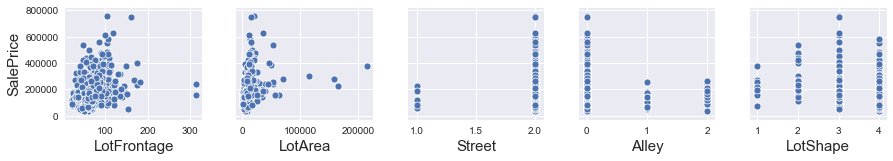

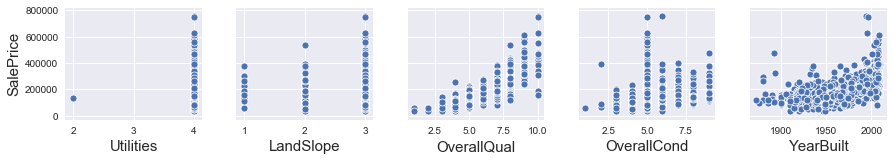

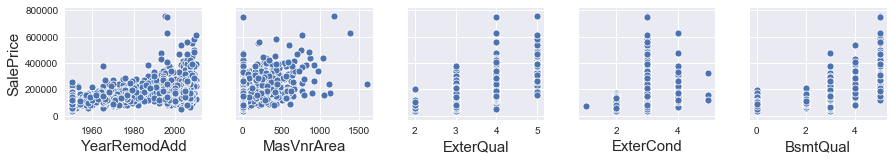

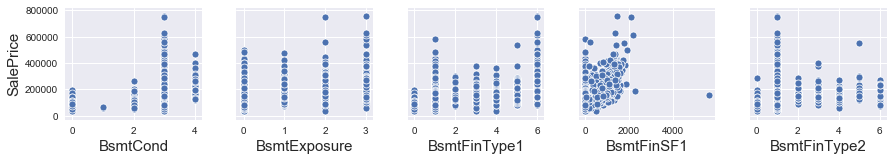

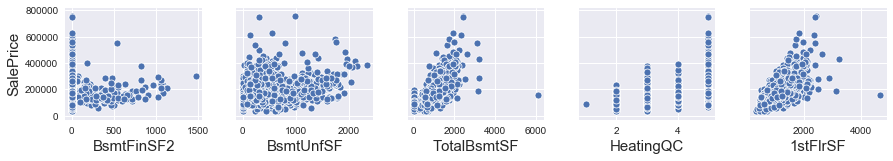

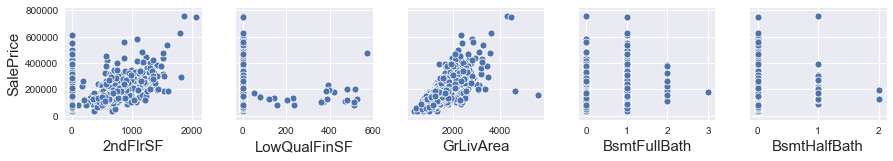

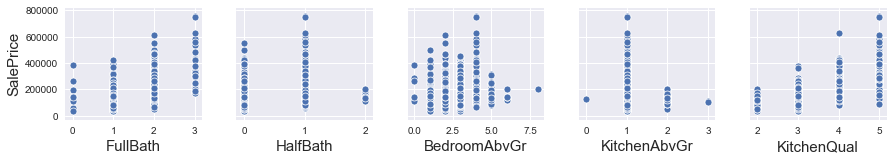

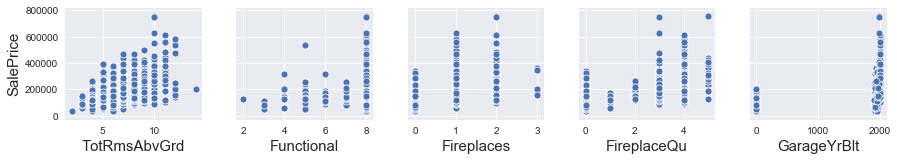

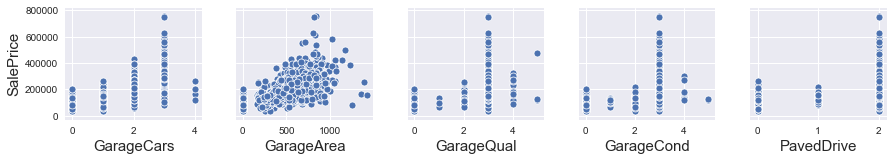

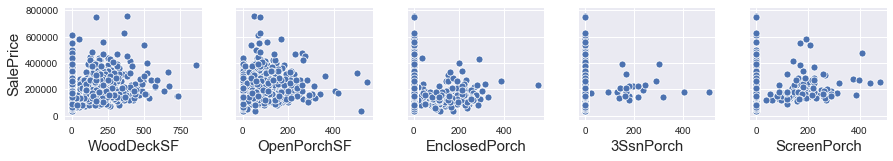

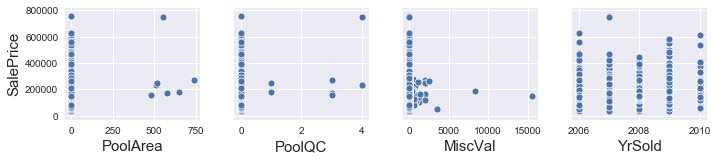

In [32]:
for lst in chunks(df_train_keep_imputed_num.columns[:-1], 5):
    sns.pairplot(df_train_keep_imputed_num, y_vars=['SalePrice'], x_vars=lst)

A few **issues** here: 
1. A lot of these don't look linear e.g. YearBuilt v SalePrice looks exponential.
2. Not sure what to do with the gluts of 0's in some graphs.
3. Assuming for now that non-continuous numerical variables have a linear relationship with SalePrice.
4. Problems: GarageYrBlt is not linear due to a glut at 0. How to rectify this? Perhaps feature engineering of some sort? Or transform GarageYrBlt somehow, perhaps. Similarly, LowQualFinSF, BsmtFinSF2, BsmtFinSF1, YearRemodAdd, YearBuilt, LotArea (Outliers?), LotFrontage (Outliers?).

**Assumption 2 (IV's): Multicollinearity**
> Pairwise scatterplots of IV's and a correlation matrix

> Ensure that there are no high pairwise correlations. 

> Recall the actual formulas being solved by linear regression: 
* Beta(hat) = inv(X'X) ** X' ** Y
* Var(Beta(hat)) = sigma^2 ** inv(X'X)

> If X is column rank deficient i.e. when one or more columns are a linear combination of other columns, then X'X will be singular (aka non-invertible), thus no solution for Beta(hat) can be found using linear regression. 

> Similarly, if there isn't an exact linear combination of columns, but close (shown by high correlation != 1), then inv(X'X) will be huge (because the determinant will be small) and Var(Beta(hat) will blow up and be useless. I think the term unstable is used when the variance is huge.

> Useful link (Read first two pages): https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/lecture-17.pdf

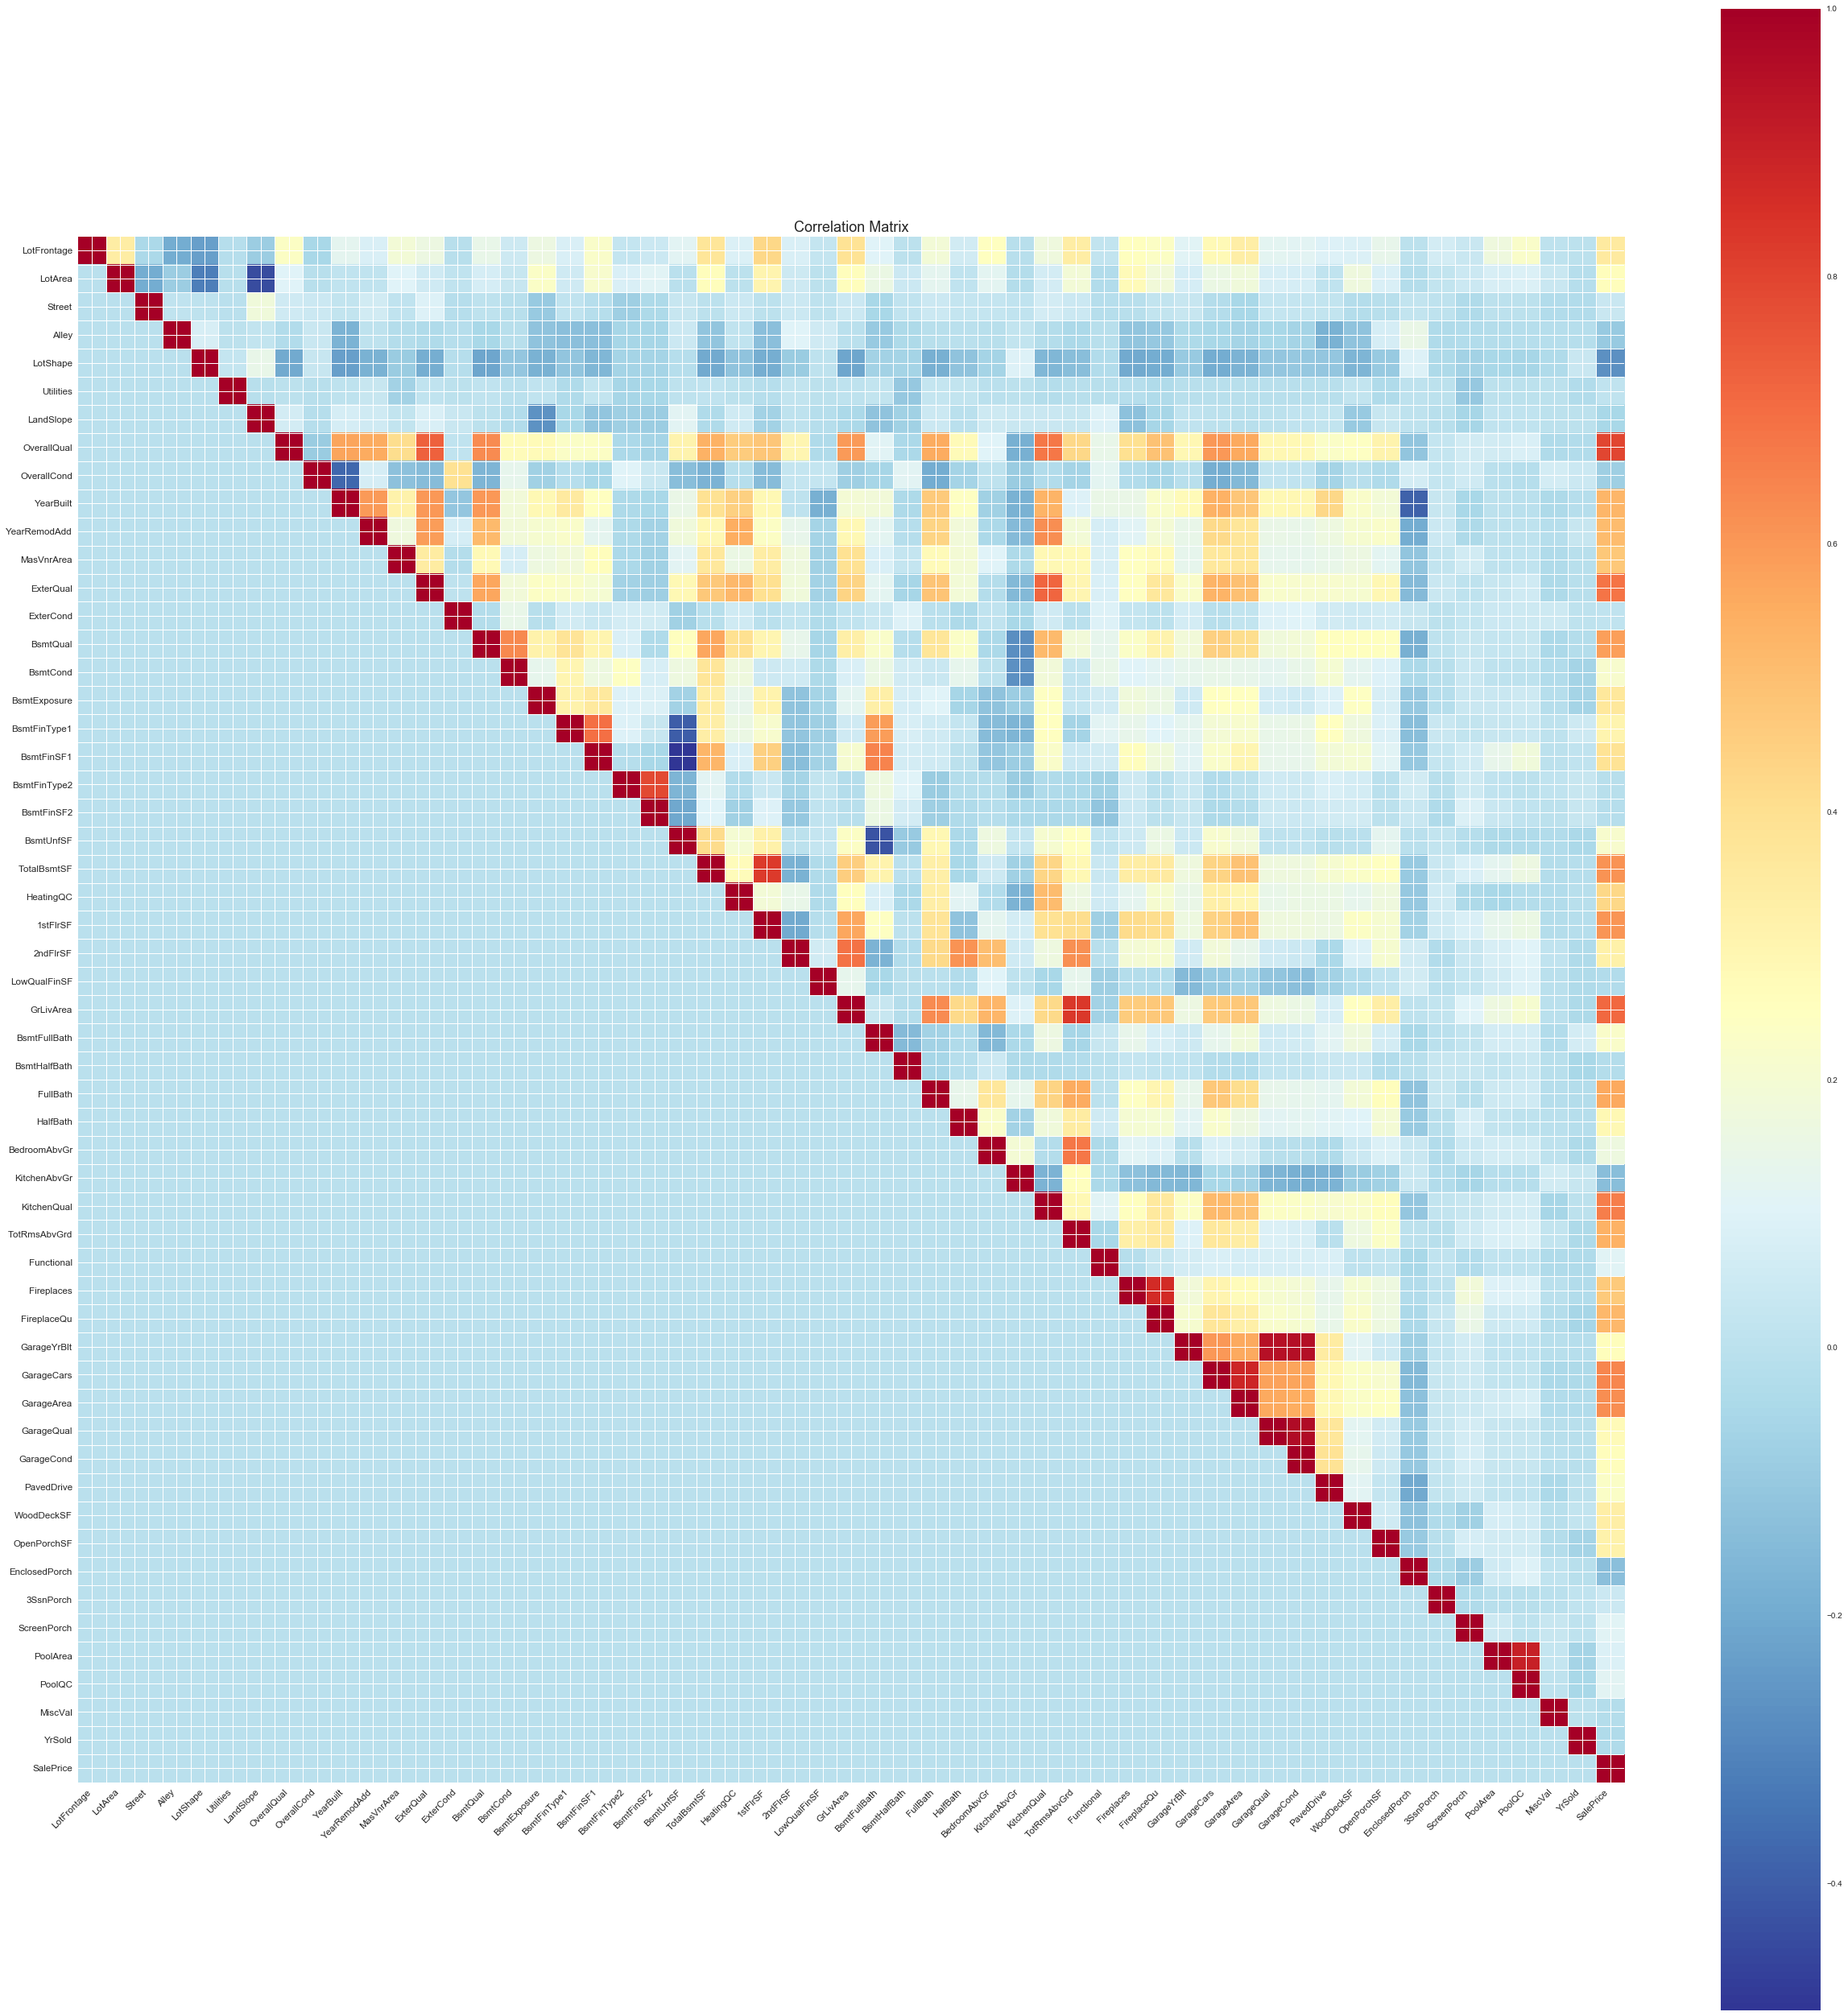

In [33]:
# sns.pairplot(df_train_keep_imputed_num) # double-click to zoom.

# Create correlation matrix
corr = df_train_keep_imputed_num[:-1].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
for i in range(corr.shape[0]):
    # this is a little hacky loop to get upper trainge (cannot simply put mask=mask when plotting as with sns.heatmap and lower triangle caused problems, but it works so I'm moving on)
    for j in range(corr.shape[1]):
        if mask[i,j] == 0:
            corr.iloc[i,j] = 0
# Nice correlation matrix plot
from statsmodels.graphics.correlation import plot_corr
with plt.rc_context():
    plt.rc("figure", figsize=(35, 35))
    plot_corr(corr,xnames=corr.columns) # cannot get correlation values on the plot when using plot_corr as far as I can see


Comments on Correlation Matrix:
> Some dark red and blue squares are a cause for concern. More investigation needed.

> I intend to investigate VIF systematically later rather than relying on the correlation matrix above.

## Linear Regression (statsmodels & sklearn)
> statsmodels functions do not fit nicely with my metrics functions, so my workflow with statsmodels and sklearn shall be as follows:

**statsmodels** 
    1. Fitting on train set, because it gives a nice summary and many parameters can be called from it
**sklearn**
    1. Fitting on train set (because I have to in order to use it for the rest of my workflow)
    2. Prediction and Evaluation on validation set - using my metrics functions
    3. Prediction on test set (if linear regression is evaluated to be the best performing model on train and validation sets)
Note: statsmodels and sklearn should produce identical models.

>I am a big fan of this link to explain linear regression assumptions etc: https://www.hackerearth.com/blog/developers/beginners-guide-regression-analysis-plot-interpretations/

In [34]:
lr_sm = sm.OLS(y_train, sm.add_constant(X_train)) # adding a constant (for Beta_0) necessary when using sm.OLS. Note: sklearn fits intercept=True by default
lr_sm_fit = lr_sm.fit()
lr_sm_fit.summary() 
# dir(lr_fit) # very useful for all the calls that can be made
# if predictions are ever needed using statsmodels: lr_val_preds = lr_sm_fit.predict(sm.add_constant(X_validation, has_constant='add')) # has_constant='add' required for this to work here: https://stackoverflow.com/questions/36532529/add-constant-in-statsmodels-not-working

C:\Program Files\Python37\Lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     53.49
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:18:37   Log-Likelihood:                -11562.
No. Observations:                1022   AIC:                         2.356e+04
Df Residuals:                     803   BIC:                         2.464e+04
Df Model:                         218                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.008e+06   1.09e+06     -0.926      0.355   -3.14e+06    1.13e+06
MSSubClass_SC160       5919.1435   1.27e+04      0.465      0.642   -1.91e+04    3.09e+04
MSSubClass_SC180      -8134.7668   1.79e+04     -0.454      0.650   -4.33e+04    2.71e+04
MSSubClass_SC190      -1.905e+04   3.14e+04     -0.607      0.544   -8.07e+04    4.26e+04
MSSubClass_SC20        1.399e+04    1.5e+04      0.930      0.353   -1.55e+04    4.35e+04
MSSubClass_SC30        1.174e+04   1.59e+04      0.737      0.462   -1.96e+04     4.3e+04
MSSubClass_SC40       -6518.6442   2.68e+04     -0.243      0.808   -5.91e+04    4.61e+04
MSSubClass_SC45        1811.5109   3.19e+04      0.057      0.955   -6.07e+04    6.43e+04
MSSubClass_SC50         1.45e+04   1.94e+04      0.749      0.454   -2.35e+04    5.25e+04
MSSubClass_SC60        2.556e+04   1.84e+04      1.392      0.164   -1.05e+04    6.16e+04
MSSubClass_SC70        2.092e+04   1.85e+04      1.130      0.259   -1.54e+04    5.73e+04
MSSubClass_SC75        3.583e+04   2.41e+04      1.486      0.138   -1.15e+04    8.32e+04
MSSubClass_SC80       -2493.0757   2.28e+04     -0.109      0.913   -4.72e+04    4.22e+04
MSSubClass_SC85        4334.7666   2.08e+04      0.208      0.835   -3.66e+04    4.53e+04
MSSubClass_SC90        -447.0157   8915.896     -0.050      0.960   -1.79e+04    1.71e+04
MSZoning_FV             2.96e+04   1.47e+04      2.011      0.045     704.617    5.85e+04
MSZoning_RH            2.174e+04   1.42e+04      1.535      0.125   -6054.610    4.95e+04
MSZoning_RL            2.184e+04   1.24e+04      1.754      0.080   -2594.638    4.63e+04
MSZoning_RM            2.135e+04   1.16e+04      1.837      0.067   -1466.904    4.42e+04
LandContour_HLS       -2379.5816   6940.073     -0.343      0.732    -1.6e+04    1.12e+04
LandContour_Low       -1.359e+04   7911.712     -1.718      0.086   -2.91e+04    1937.151
LandContour_Lvl       -7748.5829   4860.251     -1.594      0.111   -1.73e+04    1791.714
LotConfig_CulDSac      8970.6678   3979.070      2.254      0.024    1160.061    1.68e+04
LotConfig_FR2         -1842.2581   4872.144     -0.378      0.705   -1.14e+04    7721.383
LotConfig_FR3         -5337.4982   3.39e+04     -0.158      0.875   -7.18e+04    6.11e+04
LotConfig_Inside         91.0120   2185.511      0.042      0.967   -4198.978    4381.002
Neighborhood_Blueste   1.303e+04   2.08e+04      0.627      0.531   -2.78e+04    5.38e+04
Neighborhood_BrDale    4472.4006   1.42e+04      0.315      0.753   -2.34e+04    3.23e+04
Neighborhood_BrkSide   3215.8089   1.15e+04      0.279      0.781   -1.94e+04    2.59e+04
Neighborhood_ClearCr  -9620.0408   1.08e+04     -0.892      0.373   -3.08e+04    1.16e+04
Neighborhood_CollgCr  -1.802e+04   8713.430     -2.069      0.039   -3.51e+04    -921.044
Neighborhood_Crawfor   

1. Note: The summary gives a **multicollinearity** warning, thus we need to check **VIF**: https://www.statisticshowto.datasciencecentral.com/variance-inflation-factor/

> * VIF regresses each IV (X_i) on all the others (X_i+1 + X_i+2 + ... ) to see how much of the variance is explained by all the other IV's
* I'm going to list all VIF's above 10 (not a conservative number) and think about removing as necessary
* High VIF's is sometimes not a problem e.g. multicollinearity between X and X^2 is obviously expected and not an issue, dummy vars also do not necessarily need to be removedwhen exhibiting hight VIF

* I have some code to help deal with VIF below. This needs work.

In [35]:
'''from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(len(X_train.columns[:-1])):
    v = vif(np.matrix(X_train[:-1]), i)
    print("Variance inflation factor for {}: {}".format(X_train.columns[i], round(v, 2)))
    
# function for dropping largest VIF iteratively from the dataframe if I want to rerun regression on a dataset without multicollinearity
def calculate_vif_(X, thresh=5.0): # https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-in-python
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]'''

'from statsmodels.stats.outliers_influence import variance_inflation_factor as vif\n\nfor i in range(len(X_train.columns[:-1])):\n    v = vif(np.matrix(X_train[:-1]), i)\n    print("Variance inflation factor for {}: {}".format(X_train.columns[i], round(v, 2)))\n    \n# function for dropping largest VIF iteratively from the dataframe if I want to rerun regression on a dataset without multicollinearity\ndef calculate_vif_(X, thresh=5.0): # https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-in-python\n    variables = list(range(X.shape[1]))\n    dropped = True\n    while dropped:\n        dropped = False\n        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)\n               for ix in range(X.iloc[:, variables].shape[1])]\n\n        maxloc = vif.index(max(vif))\n        if max(vif) > thresh:\n            print(\'dropping \'\' + X.iloc[:, variables].columns[maxloc] +\n                  \'\' at index: \' + str(maxloc))\n     

## Diagnostic Plots (Assess Suitability of Linear Regression Model)
> Functions for Plotting Diagnostics as in R (from https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/)

C:\Program Files\Python37\Lib\site-packages\statsmodels\stats\outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
C:\Program Files\Python37\Lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Program Files\Python37\Lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Program Files\Python37\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Program Files\Python37\Lib\site-packages\ipykernel_launcher.py:125: RuntimeWarning: invalid value encountered in sqrt
C:\Program Files\Python37\Lib\site-packages\ipykernel_launcher.py:128: RuntimeWarning: invalid value encountered in sqrt


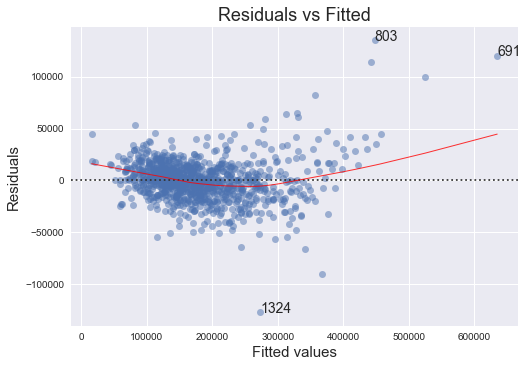

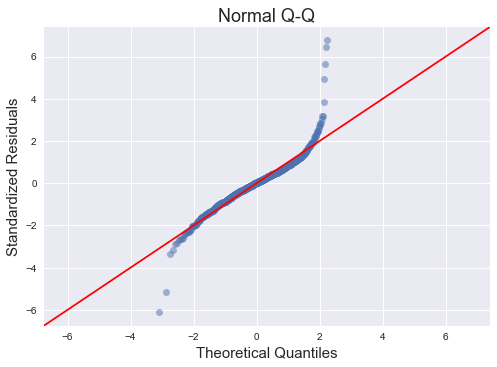

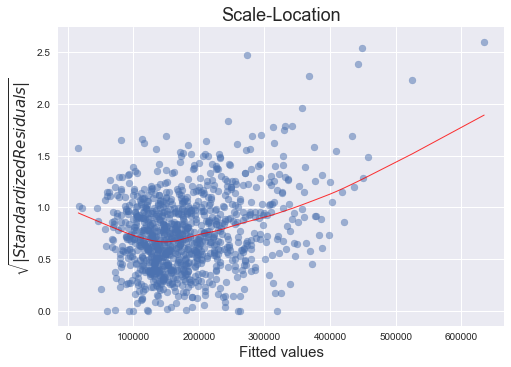

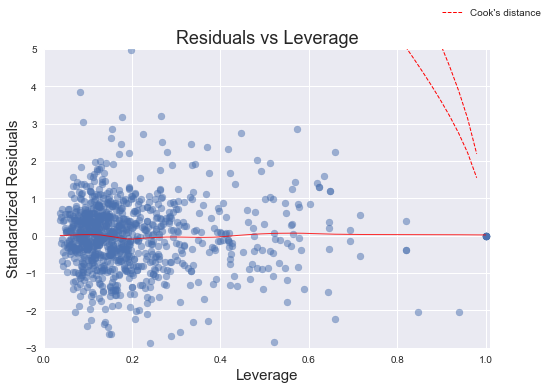

In [36]:
# Calling diagnostic functions
diagnostic_plots(X_train, y_train, model_fit=lr_sm_fit)

## Comments on Diagnostic Plots
> **Residuals vs Fitted**
* *General*: We want random noise as this would indicate that a line fits the data equally well everywhere, hence **linear** regression is suitable. 
* *Specific*:However, the bow-shaped red line indicates that we are not capturing some of the non-linear features in our model i.e. we are underfitting the model. Perhaps the variance in the data might be better captured using the square (or some other non-linear transformation) of one or more of the features. I could go through each of the features and transform all of those that are non-linear w.r.t SalePrice, but as we have a large no. of features, a quicker option for now is to use a Generalized Additive Model to capture the non-linearity.

> **Q-Q plot**  
* *General*: Non-normality of residuals affects predictions because your confidence intervals, hence p-values will not be correct. If your only aim is to get coefficients upon fitting the model, then non-normality of residuals does not pose a problem (with caveats that are way beyond me right now), but even judging which features are significant is not possible because that relies on p-values. 
* *Specific*: Clear deviation from the normal line, particularly at the tails. Extreme values make the data non-normal. These extreme values may be outliers, but not sure without further investigation of outliers. One option is to remove potential outliers (across all variables, I think) and then rerun the model. This is unlikely to remedy the problem however, given the lack of linearity above.

> **Scale Location**
* *General*: The more horizontal the red line is, the more likely the data is homoscedastic because there is no discernable pattern. 
* *Specific*: While a typical heteroscedastic plot has a sideways “V” shape, our graph has higher values on the left and on the right versus in the middle. This might be caused by not capturing the non-linearities in the model (see Residuals vs Fitted plot) and merits further investigation or model tweaking. The two most common methods of “fixing” heteroscedasticity is using a weighted least squares approach, or using a heteroscedastic-corrected covariance matrix (hccm).

> **Residuals vs Leverage**: 
* *General*: In statistics and in particular in regression analysis, leverage is a measure of how far away the independent variable values of an observation are from those of the other observations. Look for cases outside of a dashed line, Cook’s distance. When cases are outside of the Cook’s distance (meaning they have high Cook’s distance scores), the cases are influential to the regression results. The regression results will be altered if we exclude those cases.
* *Specific*: I don't have any points that lie outside Cook's distance, i.e. I have no points that have a particulary high leverage value (i.e. are highly influential). My interpretation is that I can include or remove points without having to take extreme care, whereas if a certain point had high leverage, I would have to have to be aware that removing that single point could heavily alter regression results.


> Excellent link talking about **assumptions**: https://stats.stackexchange.com/questions/29731/regression-when-the-ols-residuals-are-not-normally-distributed

**Conclusion**
> **Linear Regression is not suitable**. 

> Possible next steps: 
* Transform some features that exhibit a non-linear relationship with SalePrice and refit linear regression
* Check to make sure that outliers are not causing non-linear relationships mentioned in the previous point
* Fit a different (non-linear) model e.g. GAMs, certain GLMs, Random Forst, Neural Networks, Support Vector Regression

## Fitting and Evaluating the Linear Regression Model Using sklearn
> I call my calc_metrics function which 

In [37]:
lr_sklearn = LinearRegression() #sklearn Linear Regression
lr_sklearn_rmses = calc_metrics(X_train, y_train, X_validation, y_validation, lr_sklearn) # returns rmse for train, validation
lr_sklearn_rmse_train = lr_sklearn_rmses[0] # for statsmodels: lr_sm_rmse_train = np.sqrt(mean_squared_error(y_train, lr_sm_fit.predict(sm.add_constant(X_train))))
lr_sklearn_rmse_validation = lr_sklearn_rmses[1]

# calc_metrics fits lr_sklearn in a clean manner, but I'm fitting it outside for easy access as further exploration is needed e.g. when other metrics are of interested
lr_sklearn_fit = lr_sklearn.fit(X_train, y_train)
# dir(lr_sklearn_fit)

# rsquared (sklearn)
lr_sklearn_r2_train = r2_score(y_train, lr_sklearn_fit.predict(X_train)) # for statsmodels: lr_sm_r2_train = lr_sm_fit.rsquared

# rsquared_adj (sklearn): https://stackoverflow.com/questions/49381661/how-do-i-calculate-the-adjusted-r-squared-score-using-scikit-learn/49381947
lr_sklearn_r2_adj_train = 1-(1-lr_sklearn_r2_train)*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.iloc[:,:-1].shape[1]-1)) # for statsmodels: lr_sm_r2_adj_train = lr_sm_fit.rsquared_adj

## Predictions on Test Set (Technically Invalid)

I might compare how all the models performed on the train & validation sets before deciding which to use to make predictions on the test set, rather than wasting computing power

NB: At this stage, predictions are being made on the non-standardised version of the test set (as linear regression does not require standardisation).

In [38]:
'''lr_test_preds = lr_fit.predict(X_test) # using sklearn
lr_test_preds - lr_test_preds_sm'''

'lr_test_preds = lr_fit.predict(X_test) # using sklearn\nlr_test_preds - lr_test_preds_sm'

See Brandon Foltz's playlist, specifically his videos on evaluating multiple regression models for how we could choose which features to include (by fitting a simple linear regression for each IV v DV and checking if the p-value was significant) and evaluating the model - https://www.youtube.com/playlist?list=PLIeGtxpvyG-IqjoU8IiF0Yu1WtxNq_4z- 

# Redefining and Standardizing DataFrames (Standardising Train/Validation & Test Set)
> This does not need to be done before linear regression, but should be done before performing regularized regression

> Now, I will redefine X_train and X_validation from **df_train_keep_imputed_ready**, and apply all other models to these DataFrames.

In [75]:
X_train, X_validation, y_train, y_validation = train_test_split(df_train_keep_imputed_ready, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_validation : " + str(X_validation.shape))
print("y_train : " + str(y_train.shape))
print("y_validation : " + str(y_validation.shape))

X_test = df_test_keep_imputed_ready # Defining X_test for all other models (excluding regression)

X_train : (1022, 255)
X_validation : (438, 255)
y_train : (1022,)
y_validation : (438,)


## Deciding if I Should Standardize Features
> I ran X_train.describe() and eyeballed to see if I should standarise features

> I decided would be worth considering standardising IV's because of magnitude differences
* e.g. LotArea can be as large as 215245 and OverallQual max is 10, but from common sense, I cannot say LotArea is up to 4 levels of magnitude more important than OverallQual


In [76]:
numerical_cols = discrete+continuous
numerical_cols.remove('SalePrice')
stdSc = StandardScaler()
X_train.loc[:, numerical_cols] = stdSc.fit_transform(X_train.loc[:, numerical_cols]) # getting warnings here but it seems to be working
X_validation.loc[:, numerical_cols] = stdSc.transform(X_validation.loc[:, numerical_cols])

X_test.loc[:, numerical_cols] = stdSc.transform(X_test.loc[:, numerical_cols]) # X_test is now standardised

C:\Program Files\Python37\Lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Program Files\Python37\Lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# TODO: Regularised Regression (Ridge & Lasso)

### Decision Tree

In [41]:
# Fitting a Decision Tree as Linear Regression performed very poorly
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()

dt_rmses = calc_metrics(X_train, y_train, X_validation, y_validation, dt) # rmse on train and validation

# Prediction on test set using DT
#dt_test_preds = dt_fit.predict(X_test)

### Random Forest

In [42]:
# Fitting a Random Forest using final_test
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf_rmses = calc_metrics(X_train, y_train, X_validation, y_validation, rf)

# Again, I want to fit my rf outside the model to do more with it. Maybe I should change my calc_metrics functions to return to actual fit (if possible), or else scrap them.
rf.fit(X_train, y_train)
# https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
# Print the name and gini importance of each feature
for feature in zip(X_train.columns, rf.feature_importances_):
    print(feature)
# https://stackoverflow.com/questions/42128545/how-to-print-the-order-of-important-features-in-random-forest-regression-using-p
important_features_dict = {}
for x,i in enumerate(rf.feature_importances_):
    important_features_dict[x]=i

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
# Now, important_features_list is a list of the indices of X_train.columns, sorted by feature importance according to my random forest

print ('Most important features: {}' .format(X_train.columns[important_features_list]))
# Now to get the column names and the feature importance values together in one dataframe. This all seems a bit hacky but it was the only way I could find, as you can't just sort feature_importances_when you just call it.
df_imp_cols = X_train.columns[important_features_list].to_frame().reset_index(drop=True)
df_imp_vals = pd.DataFrame([important_features_dict[key] for key in important_features_list])
df_imp_feats = pd.concat([df_imp_cols, df_imp_vals], axis=1) # ignore_index=True was not working as I expected, so I had to use <<reset_index()>> when creating df_imp_cols
df_imp_feats.set_axis(['Features', 'Importance(Gini)'], axis=1, inplace=True) # using <<set_axis>> instead of <<rename>>, because both of the column names were the same (0) after concatenation.

# Prediction on test set using RF
#rf_test_preds = rf_fit.predict(X_test)

C:\Program Files\Python37\Lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('MSSubClass_SC120', 1.3727702556837992e-05)
('MSSubClass_SC160', 7.949662583927513e-06)
('MSSubClass_SC180', 2.8132456077763152e-09)
('MSSubClass_SC190', 4.2435751660548e-07)
('MSSubClass_SC20', 0.00013074028557271878)
('MSSubClass_SC30', 0.000414143236499042)
('MSSubClass_SC40', 0.0)
('MSSubClass_SC45', 4.2473509082644735e-07)
('MSSubClass_SC50', 0.0002995258136346656)
('MSSubClass_SC60', 0.002367480895501605)
('MSSubClass_SC70', 0.00044227404122591774)
('MSSubClass_SC75', 8.412860300713542e-07)
('MSSubClass_SC80', 0.00012745668445829304)
('MSSubClass_SC85', 6.366092685067302e-06)
('MSSubClass_SC90', 5.0919776985196995e-06)
('MSZoning_C (all)', 0.00031226147636209266)
('MSZoning_FV', 2.9527973508918407e-05)
('MSZoning_RH', 2.516310471123019e-05)
('MSZoning_RL', 0.0018660167192418593)
('MSZoning_RM', 0.0005396762225408452)
('LandContour_Bnk', 0.0010732228465378853)
('LandContour_HLS', 1.5988861029260908e-05)
('LandContour_Low', 3.3205885268179303e-06)
('LandContour_Lvl', 0.00041501925

### XGBoost

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb_rmses = calc_metrics(X_train, y_train, X_validation, y_validation, xgb)

# xgb.fit(X_train, y_train) # this takes a long time to run

### Neural Network
* https://www.youtube.com/watch?v=-vHQub0NXI4

In [77]:
# tensorflow stuff
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#print(tf.__version__)

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse']) # want rmse also but 'rmse' does not exist
  return model

"import tensorflow.keras as keras\nnn_model = tf.keras.models.Sequential()\nnn_model.add(tf.keras.layers.Flatten())\nnn_model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))\nnn_model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))\nnn_model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))\nnn_model.compile(optimizer='adam',\n              loss='sparse_categorical_crossentropy',\n              metrics=['accuracy'])\nnn_model.fit(X_train.values, y_train.values, epochs=10, validation_split=0.3)"

In [78]:
nn_model = build_model()

In [79]:
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                16384     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 20,609
Trainable params: 20,609
Non-trainable params: 0
_________________________________________________________________


In [80]:
example_batch = X_train[:10]
nn_model.predict(example_batch) # we haven't even trained the model yet, this is just to make sure the model runs

array([[ 0.98961306],
       [ 0.71611   ],
       [ 0.26805842],
       [-0.39702392],
       [-0.9391055 ],
       [ 0.15274155],
       [-0.39754355],
       [ 0.29903764],
       [ 0.78391814],
       [-0.47532487]], dtype=float32)

In [81]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = nn_model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [82]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,5.707829e+08,13803.666992,570782848.0,4.291491e+08,15141.382812,429149152.0,995
996,5.713779e+08,13816.376953,571377792.0,4.307213e+08,15203.606445,430721280.0,996
997,5.702558e+08,13814.462891,570255744.0,4.293997e+08,15142.225586,429399712.0,997
998,5.703412e+08,13808.106445,570341184.0,4.317676e+08,15227.866211,431767616.0,998
999,5.712029e+08,13807.691406,571202944.0,4.299212e+08,15161.802734,429921152.0,999


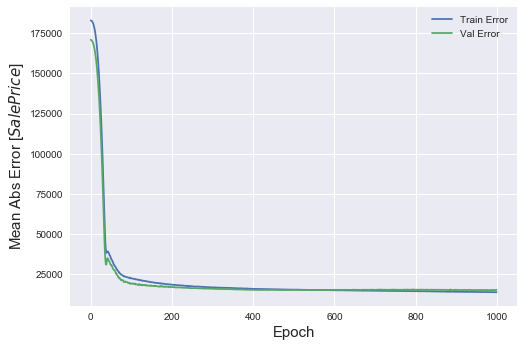

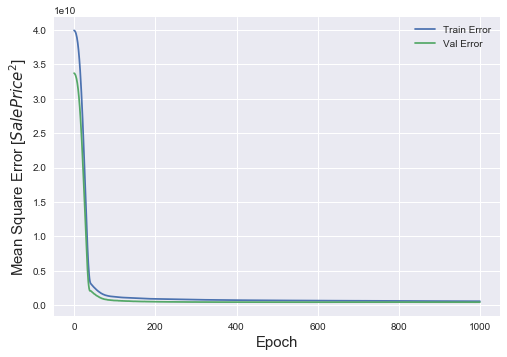

In [91]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [$SalePrice$]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    #plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error [$SalePrice^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    #plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)

In [102]:
loss, mae, mse = nn_model.evaluate(X_validation, y_validation, verbose=2)

print("Validation set Mean Squared Error: $ {:5.2f}".format(mse))
print("Validation set Mean Absolute Error: $ {:5.2f}".format(mae))

#nn_test_predictions = nn_model.predict(X_test).flatten()

438/438 - 0s - loss: 1726619934.3927 - mean_absolute_error: 19022.5840 - mean_squared_error: 1726620032.0000
Validation set Mean Squared Error: $ 1726620032.00
Validation set Mean Absolute Error: $ 19022.58


### Generalised Additive Models (GAMs)

Given that there are some non linear relationships between the IV's and DV, GAMs seems like a reasonable next step to take. GAMs are very powerful as they allow us to use a different function on each IV.
> Useful links for the below:
* https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html
* https://www.kaggle.com/spandan28/gam-for-dc-bike-share
* https://christophm.github.io/interpretable-ml-book/extend-lm.html#gam

> The first cell below is where I set up all the columns to be called in f() + s(). This makes things much quicker in the long run as is a reasonably general solution

In [188]:
X_train.dtypes.value_counts()

f_cols = X_train.loc[:, X_train.dtypes == 'uint8'].columns
f_col_index=[]
for col_name in f_cols:
    f_col_index.append(X_train.columns.get_loc(col_name))
f_formula = f(0)
for i in f_col_index[1:]:
    f_formula = f_formula+f(i)

# for s(), I need to do separate loops for each int and float type, and concat at the end
int32_cols = X_train.loc[:, X_train.dtypes == 'int32'].columns
int32_col_index = []
for col_name in int32_cols:
    int32_col_index.append(X_train.columns.get_loc(col_name))

int64_cols = X_train.loc[:, X_train.dtypes == 'int64'].columns
int64_col_index = []
for col_name in int64_cols:
    int64_col_index.append(X_train.columns.get_loc(col_name))

float64_cols = X_train.loc[:, X_train.dtypes == 'float64'].columns
float64_col_index = []
for col_name in float64_cols:
    float64_col_index.append(X_train.columns.get_loc(col_name))

s_col_index = int32_col_index + int64_col_index + float64_col_index
s_formula = s(0)
for i in s_col_index[1:]:
    s_formula = s_formula+s(i)

f(0) + f(1) + f(2) + f(3) + f(4) + f(5) + f(6) + f(7) + f(8) + f(9) + f(10) + f(11) + f(12) + f(13) + f(14) + f(15) + f(16) + f(17) + f(18) + f(19) + f(20) + f(21) + f(22) + f(23) + f(24) + f(25) + f(26) + f(27) + f(28) + f(29) + f(30) + f(31) + f(32) + f(33) + f(34) + f(35) + f(36) + f(37) + f(38) + f(39) + f(40) + f(41) + f(42) + f(43) + f(44) + f(45) + f(46) + f(47) + f(48) + f(49) + f(50) + f(51) + f(52) + f(53) + f(54) + f(55) + f(56) + f(57) + f(58) + f(59) + f(60) + f(61) + f(62) + f(63) + f(64) + f(65) + f(66) + f(67) + f(68) + f(69) + f(70) + f(71) + f(72) + f(73) + f(74) + f(75) + f(76) + f(77) + f(78) + f(79) + f(80) + f(81) + f(82) + f(83) + f(84) + f(85) + f(86) + f(87) + f(88) + f(89) + f(90) + f(91) + f(92) + f(93) + f(94) + f(95) + f(96) + f(97) + f(98) + f(99) + f(100) + f(101) + f(102) + f(103) + f(104) + f(105) + f(106) + f(107) + f(108) + f(109) + f(110) + f(111) + f(112) + f(113) + f(114) + f(115) + f(116) + f(117) + f(118) + f(119) + f(120) + f(121) + f(122) + f(1

In [208]:
# Fitting a GAM - but this is exceptionally basic for now
# One-hot-encoding would be done in f() if there was more than 1 level, but I have already one-hot-encoded. Same difference.
# Not sure if I should be using GAM or LinearGAM
gam = GAM(s_formula+f_formula).fit(X_train, y_train)
gam.summary()

gam.predict(X_validation)

'''Not working: # https://github.com/dswah/pyGAM/issues/131
gammy = LinearGAM(s_formula+f_formula)
calc_metrics(X_train, y_train, X_validation, y_validation, gammy)
'''

'''# a lot of extra GAM stuff here(commenting out for now)
gam.gridsearch(X_train.iloc[:, 0:4], y_train)
## plotting
plt.figure();
fig, axs = plt.subplots(1,4, figsize=(20,5));

titles = [col for col in X_train.columns[0:4]]
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i]);

# Plotting prediction intervals on the train set...
plt.plot(gam.predict(XX), 'r--')
plt.plot(gam.prediction_intervals(XX, width=.95), color='b', ls='--')

#plt.plot(y_train, facecolor='gray', edgecolors='none')
plt.title('95% prediction interval')

# If I go and create a usable validation set then I can predict actuals v predicted using the below:
plt.plot(y_val, gam.predict(X_val),"*")
plt.xlabel("Predicted Value")
plt.ylabel("Actual value")'''

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     375.456
Link Function:                     IdentityLink Log Likelihood:                                -20924.2572
Number of Samples:                         1022 AIC:                                            42601.4264
                                                AICc:                                           43042.3447
                                                GCV:                                        833749123.1488
                                                Scale:                                       310872773.411
                                                Pseudo R-Squared:                                   0.9678
Feature Function                  Lam

C:\Program Files\Python37\Lib\site-packages\ipykernel_launcher.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """


ValueError: X data is out of domain for categorical feature 120. Expected data on [0.0, 0.0], but found data on [0.0, 1.0]

In [226]:
# Investigating why GAM is not working on validation...different levels on categorical feature 120 apparently
print(X_train[f_cols[120]].value_counts().index)
print(X_validation[f_cols[120]].value_counts().index)
print(X_train[f_cols[120]].value_counts().index == X_validation[f_cols[120]].value_counts().index)

for col in f_cols:
    if np.all(X_train[col].value_counts().index, X_validation[col].value_counts().index): # https://stackoverflow.com/questions/10062954/valueerror-the-truth-value-of-an-array-with-more-than-one-element-is-ambiguous
        print(col)

UInt64Index([0, 1], dtype='uint64')
UInt64Index([0, 1], dtype='uint64')
[ True  True]


AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [241]:
#X_train.loc[:,f_cols].value_counts()
X_train.loc[:,f_cols].apply(pd.Series.value_counts)

UInt64Index([0, 1], dtype='uint64')

# TODO: Feature Selection (based on model outputs or correlations from earlier)

# TODO: Comparing between models 
> **Ideas**: CV and compare avg.RMSE
> Each time I calculate an RMSE (+ other appropriate measures) for a model above, I could add it to a dictionary/table (similar to the titanic dataset) and then call the output in this cell to compare.

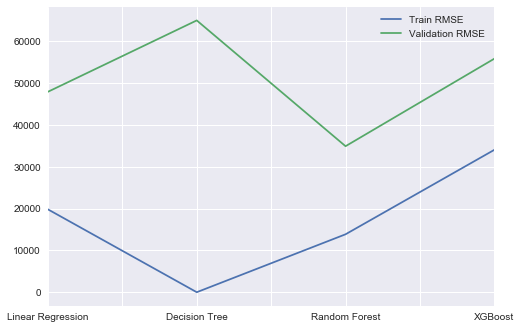

In [53]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'] # just using this for names of rows in metrics_table below
model_rmses = [lr_sklearn_rmses, dt_rmses, rf_rmses, xgb_rmses]
metrics_table = pd.DataFrame(np.empty([len(model_rmses), len(lr_sklearn_rmses)])) # 2 columns
metrics_table.columns = (['Train RMSE', 'Validation RMSE'])
for i in range(metrics_table.shape[0]):
    for j in range(metrics_table.shape[1]):
        metrics_table.iloc[i, j] = model_rmses[i][j]
metrics_table = metrics_table.rename(index = lambda x: models[x]) 

# Instead of the below plot, I could try to plot a line between the two RMSEs for all models, but the below is ok for now
metrics_table.plot()

### Comments on model performances:
Decision Tree is giving 0 error on the train set. I'm not sure if there is something incorrect going on in my code, or if this is a case of gross overfitting.

## TODO: Cross Validation

# Submission

In [ ]:
sub = pd.DataFrame()
sub['Id'] = df_test['Id']
sub['SalePrice'] = rf_preds
sub.to_csv('rf_submission.csv',index=False)

In [ ]:
#---------------------------#
#-------BELOW HERE NEEDS WORK -------------------#

In [ ]:
'''                      
# ----------------- Ridge Regression ------------------------
# I should normalise/standardise(?) data before doing any sort of penalisation so that all params are on same scale
# https://stats.stackexchange.com/questions/186060/why-is-ridge-regression-giving-different-results-in-matlab-and-python/186070#186070

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
ridge.coef_ # think this only returns coef's of last model. I want to return for all alphas and present in a dataframe format, along with RSS
ridge.intercept_ # want to return this for all alphas also. Sidenote: what does this intercept mean as it's very large?
# need to write i) my own fn for rss here, and also my own fn for ridge regression in general - https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 500000, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

# --------------------------- Lasso Regression - Getting convergence errors, apparently due to very small alphas

lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha) # I think it picked 1.4 but not sure

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean()) # This took about 20 mins to run. It returned 27814.049757
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean()) # This took a further 10+ mins. Returned approx 29685
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

# ------------------- Plotting coeff's for different regressions ---------------------

# Using best alphas (lambdas) to fit plots from above
rr = Ridge(alpha=27)
rr.fit(X_train, y_train)

lasso = Lasso(alpha=1.4)
lasso.fit(X_train, y_train)

plt.figure(figsize=(60,15))
plt.style.use('seaborn-whitegrid')
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 27$',zorder=7) # zorder for ordering the markers
plt.plot(lasso.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 1.4$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression') #alpha=0.4 in plot command refers to opacity, not regularisation param lambda(sometimes referred to as alpha)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=90)
# plt.ylim(-100,100) # just to make sure that the ridge and lasso aren't setting all coeffs to 0
plt.show()
'''